# IAU project 1

## Matej Ševčík, Vladyslav Chesnykov (50%, 50%)

    Matej Ševčík: Pair analysis of data, EDA with visualisation, second hypothesis.

    Vladyslav Chesnykov: Problem identification and partial correction, first hypothesis.

# Loading data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import pearsonr
from numpy import cov

In [2]:
user = pd.read_csv("dataset_iau/user.csv", sep='\t')
session = pd.read_csv("dataset_iau/session.csv", sep='\t')
product = pd.read_csv("dataset_iau/product.csv", sep='\t')

In [3]:
product.head()

,product_ean,code,store_name,location
0,4309748882180,US,Tyler,America/Chicago
1,5851941655164,PK,Alipur,Asia/Karachi
2,5289124458231,MY,Kampung Ayer Molek,Asia/Kuala_Lumpur
3,6565130443652,US,Glendale,America/Los_Angeles
4,8081875346334,PH,Naga,Asia/Manila


In [4]:
user.head()

,residence,sex,username,user_id,address,birthdate,race,job,name,current_location,mail
0,NaN,F,vigorellimatilda,295,"Borgo Gelsomina, 3 Piano 9\n12013, Chiusa Di P...",1917-03-25,NaN,NaN,Gemma Baracca,NaN,cesarecagnotto@tim.it
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,matsumotoasuka,298,三重県西東京市上広谷3丁目27番1号,NaN,NaN,演歌歌手,近藤 翼,"(Decimal('44.4329015'), Decimal('-94.188145'))",nakajimaatsushi@yahoo.com
2,"68187 Matthews Turnpike Suite 738\nWhitebury, ...",F,debra19,591,"63067 Jeffrey Village\nEast Jeffrey, TX 08868",1985-05-21,white,Tourism officer,Belinda Harvey,"(Decimal('17.674891'), Decimal('43.063751'))",kevindeleon@yahoo.com
3,"Canale Majorana, 522\n98168, Villaggio Annunzi...",NaN,udineseimelda,2538,NaN,2012-01-02,asian,NaN,Sig.ra Susanna Roero,"(Decimal('-65.4578585'), Decimal('-162.734373'))",federicacaccioppoli@tele2.it
4,NaN,NaN,debra72,590,USCGC Kim\nFPO AA 25581,NaN,white,NaN,Deborah Larson,"(Decimal('-67.907028'), Decimal('-104.061594'))",stevendavis@yahoo.com


In [5]:
session.head()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937


# ANALYSIS OF DATA STRUCTURE

We are working with the dataset 70. It contains 3 files: product.csv, session.csv, user.csv (csv - comma-separated values).

### FILE product.csv

The file associates products with the stores that sell them and lists the locations of those stores. It is 613 KB long and contains 4 columns.

In [6]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14958 entries, 0 to 14957
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_ean  14958 non-null  int64 
 1   code         14941 non-null  object
 2   store_name   14958 non-null  object
 3   location     14958 non-null  object
dtypes: int64(1), object(3)
memory usage: 467.6+ KB


### FILE user.csv

The file provides details of the users observed, such as their permanent residence, gender, date of birth, occupation. It is 446 KB and contains 11 columns.)

In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   residence         890 non-null    object
 1   sex               1271 non-null   object
 2   username          2542 non-null   object
 3   user_id           2542 non-null   int64 
 4   address           2161 non-null   object
 5   birthdate         1398 non-null   object
 6   race              763 non-null    object
 7   job               1017 non-null   object
 8   name              2542 non-null   object
 9   current_location  2415 non-null   object
 10  mail              2542 non-null   object
dtypes: int64(1), object(10)
memory usage: 218.6+ KB


### FILE session.csv

The file contains details of individual user sessions. It provides various details, in particular information on whether the session ended with a product purchase (ack), the identifier of the user who attended the session (user_id) and the identifier of the product (product_ean) that was involved. In addition, it also describes, for example, the length of the session, the screen size of the device or the speed of the user's mouse movement. It is 2.26 MB and contains 25 columns.

In [8]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11078 non-null  float64
 1   total_load_time                 11089 non-null  float64
 2   mouse_move_total_rel_distance   11078 non-null  float64
 3   session_start                   11089 non-null  object 
 4   session_id                      11089 non-null  int64  
 5   ack                             11089 non-null  float64
 6   screen_width                    11089 non-null  object 
 7   pct_click                       11078 non-null  float64
 8   browser_name                    11089 non-null  object 
 9   pct_mouse_move                  11078 non-null  float64
 10  pct_click_product_info          11078 non-null  float64
 11  pct_scroll_move_duration        11078 non-null  float64
 12  pct_scrandom                    

# IDENTIFING PROBLEMS IN DATA (WITH PARTIAL SOLUTION)

## FIRST SEEN:

***In the provided date consisting of three datasets, we can find problems of the following types:***

   **USER**
    
   1. From the output of the first rows of the **user table**, we can see that some rows are written in **hieroglyphs**. (we have 2 options for dealing with this problem: either write a function that can translate from hieroglyphs to Latin symbols, or if their number is NOT significant - **delete it**, if significant - one of the **options for dealing with NaN**)
        
        
   2. **Unstructured data** in some fields, such as address or residence. In some of them there are postal codes, in random places. (Are these indexes necessary at all? How will they affect data analysis? I think that it will be possible to write an additional function that will **correct the unstructuredness**, **remove additional characters**, such as, for example: numbers, tabs, newline characters. Perhaps the address can be simplified to the simplier form (cities).) I think that this problem needs a more difficult solution, so we will solve it in the **second phase of the project**.
   
   
    
   3. In the field **job** using the unique method, you can see that the job attributes **is too long** what is unnecessary for analysis. I think that it will be possible **to write a function** that standardizes all works **to a more readable form**.
    
    
   4. In the **current_location** field, you can see a type of data that is not convenient for analysis **(Decimal('44.4329015'), Decimal('-94.188145'))**. I think that this problem needs a more difficult solution, so we will solve it in the **second phase of the project**.
    
    
   5. etc.
    
   **PRODUCT**
   
   1. The **location** field can be divided into a more convenient view, that is, **into 2 columns, country and city**.
    
   2. etc.
    
   **SESSION**
   
   1. In the dataset MAYBE there are a lot of **unnecessary fields** that will not be triggered in the analysis, that do not represent analytical value. For example, what exhibits can we make from information about the user's extension? (Let's just remove some, in our opinion, redundant information from the dataset)
    
   2. etc.
   
   **ETC.**
   
       Almost all datasets have outliers + duplicates + missing data. We will deal with this situationally in most cases. In particular, we will delete only rows with a too large percentage of missing data, because these rows do not represent analytical value for us.
       
   **ADDITIONAL NOTES**
   
        The goal is also to output one continuous dataset by connecting fields (product_ean, user_id). This will provide us with a faster and, accordingly, more practical access to data. Except for some exceptional cases where we will probably need to use split datasets.

## USER CORRECTING

### USEFULLNESS OF FIELDS

- Fields **race, username and mail** are **NOT analyticly valuable**. So that we can delete them.

- **residence vs. address vs. current_location**?? Do we need all of them??

     

- We can check exactly which **coordinates** are presented in the field of **current_location**, accordingly in some variants we will get values that refer us to the middle of the ocean, which leads us to the **conclusion about the randomness** of some data. Accordingly, it is not yet known how exactly we should use this attribute.

  **Example:** 
  
           (Decimal('-67.907028'), Decimal('-104.061594')) - 67°54'25.3"S 104°03'41.7"W (Pacific Ocean)
  
           (Decimal('-85.641904'), Decimal('-53.404531')) - 85°38'30.9"S 53°24'16.3"W (Antarctic Ice shield)
           
           (Decimal('85.034897'), Decimal('164.620498')) - 85°02'05.6"N 164°37'13.8"E (Arctic Ocean)

- Can use name for **predicting sex** (using it as ack)?? For example, if we shall get **from name** last char, and it appears to be 'a', and if sex="NaN", then we change it to F. (just theory)


In [9]:
user = user.drop(columns=['race', 'username', 'mail', 'name', 'job'], axis=1)
user

,residence,sex,user_id,address,birthdate,current_location
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\n12013, Chiusa Di P...",1917-03-25,NaN
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,NaN,"(Decimal('44.4329015'), Decimal('-94.188145'))"
2,"68187 Matthews Turnpike Suite 738\nWhitebury, ...",F,591,"63067 Jeffrey Village\nEast Jeffrey, TX 08868",1985-05-21,"(Decimal('17.674891'), Decimal('43.063751'))"
3,"Canale Majorana, 522\n98168, Villaggio Annunzi...",NaN,2538,NaN,2012-01-02,"(Decimal('-65.4578585'), Decimal('-162.734373'))"
4,NaN,NaN,590,USCGC Kim\nFPO AA 25581,NaN,"(Decimal('-67.907028'), Decimal('-104.061594'))"
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\n487 16 Vysoké nad Jizerou,NaN,"(Decimal('6.326596'), Decimal('50.261770'))"
2538,NaN,F,1783,Bachmanngasse 96\n15562 Pasewalk,NaN,"(Decimal('-20.2418925'), Decimal('-42.286118'))"
2539,"Canale Maria, 73\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\n21030, Cugliate (VA)",NaN,"(Decimal('-85.641904'), Decimal('-53.404531'))"
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\nVila Da Paz\n9...",1954-07-03,"(Decimal('-51.687864'), Decimal('135.289800'))"


In [10]:
from datetime import datetime
user['birthdate'] = pd.to_datetime(user['birthdate'])
today = datetime(2023, 10, 29)
user['age'] = today - user['birthdate']
user['age'] = user['age'] // pd.Timedelta(days=365.25)
user = user.drop('birthdate', axis=1)
#user['age'].fillna(-1, inplace=True)
#user['age'] = user['age'].astype(int)
#user = user.replace(-1, np.nan)
user

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\n12013, Chiusa Di P...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,"68187 Matthews Turnpike Suite 738\nWhitebury, ...",F,591,"63067 Jeffrey Village\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\n98168, Villaggio Annunzi...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\n487 16 Vysoké nad Jizerou,"(Decimal('6.326596'), Decimal('50.261770'))",NaN
2538,NaN,F,1783,Bachmanngasse 96\n15562 Pasewalk,"(Decimal('-20.2418925'), Decimal('-42.286118'))",NaN
2539,"Canale Maria, 73\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\n21030, Cugliate (VA)","(Decimal('-85.641904'), Decimal('-53.404531'))",NaN
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\nVila Da Paz\n9...","(Decimal('-51.687864'), Decimal('135.289800'))",69.0


### OUTLAYER PROBLEMS

*Main outlayer problem in user dataset is **hieroglyphs' form of some attributes**. So that we can check its count form **.unique() method**. Let's write the method for **checking percentage** of hieroglyph symbols in each column.*

In [11]:
import re

def get_percent_of_hieroglyphs(col):
    uniq = user[col].unique()
    not_hieroh = []
    pattern = r"^[a-zA-Z0-9]+"
    for text in uniq:
        if isinstance(text, str) and re.match(pattern, text):
            not_hieroh.append(text)
    print(f"Count of NOT hieroglyph: {len(not_hieroh)}")
    print(f"Count of all unique: {len(uniq)}")
    print(f"Percent of hieroglyphs in {col}: {100 - (len(not_hieroh)/len(uniq) * 100)}%")

get_percent_of_hieroglyphs("residence")
get_percent_of_hieroglyphs("address")

Count of NOT hieroglyph: 737
Count of all unique: 891
Percent of hieroglyphs in residence: 17.28395061728395%
Count of NOT hieroglyph: 1749
Count of all unique: 2162
Percent of hieroglyphs in address: 19.102682701202582%


In [12]:
# from decimal import Decimal

# def convert_to_dms(coordinate, is_latitude):
#     try:
#         decimal_coordinate = Decimal(coordinate)
#         degrees = int(abs(decimal_coordinate))
#         minutes = int((abs(decimal_coordinate) - degrees) * 60)
#         seconds = (abs(decimal_coordinate) - degrees - minutes / 60) * 3600

#         if is_latitude:
#             direction = "N" if decimal_coordinate >= 0 else "S"
#         else:
#             direction = "E" if decimal_coordinate >= 0 else "W"

#         formatted_value = f"{degrees}°{minutes}'{seconds:.1f}\"{direction}"
#         return formatted_value
#     except ValueError:
#         return np.nan

# user['current_location'] = user['current_location'].apply(lambda x: convert_decimal_to_dms(x, is_latitude=True))

    Here I tried to solve the problem with addresses, the problem is that the address field is totally unstructured and is cobbled together from the most heterogeneous data possible. First of all, I think we have to create a language model that can recognize the structure of the address and extract the data we need from it. Namely, to extract the user's city or country. Then there is the problem of dealing with hieroglyphics, and the only thing that comes to mind is trying to translate them, because using my own function I was able to see how many of them there are in the address column and found that there are as many as 20 percent of them, which is too much to remove. And the last nuance is that we need to somehow translate the coordinates of the current location into the place itself, namely its name.

*We have too much words in job attributes, that's why we should **simplifize some of jobs to one word**, if we could, for this we will write a **method:***

### DUPLICATES PROBLEMS

In [13]:
duplicates_count = user.apply(lambda x: x.duplicated().sum())
duplicates_count

residence           1651
sex                 2539
user_id              936
address              380
current_location     126
age                 2424
dtype: int64

In [14]:
user = user.drop_duplicates(keep='first')
user

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\n12013, Chiusa Di P...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,"68187 Matthews Turnpike Suite 738\nWhitebury, ...",F,591,"63067 Jeffrey Village\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\n98168, Villaggio Annunzi...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\n487 16 Vysoké nad Jizerou,"(Decimal('6.326596'), Decimal('50.261770'))",NaN
2538,NaN,F,1783,Bachmanngasse 96\n15562 Pasewalk,"(Decimal('-20.2418925'), Decimal('-42.286118'))",NaN
2539,"Canale Maria, 73\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\n21030, Cugliate (VA)","(Decimal('-85.641904'), Decimal('-53.404531'))",NaN
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\nVila Da Paz\n9...","(Decimal('-51.687864'), Decimal('135.289800'))",69.0


In [15]:
count_of_user_dup = user['user_id'].duplicated().sum()
print(f"Count of user duplicates: {count_of_user_dup}")

Count of user duplicates: 936


In [16]:
# duplicates = user[user['user_id'].duplicated(keep=False)]
# duplicates 
duplicates_count = user['user_id'].value_counts()
duplicates_count_df = duplicates_count.reset_index()
duplicates_count_df.columns = ['user_id', 'count_of_duplicates']
duplicates_count_df


,user_id,count_of_duplicates
0,368,6
1,961,6
2,1023,5
3,2057,5
4,1702,5
...,...,...
1601,175,1
1602,2129,1
1603,12,1
1604,1963,1


*We have a problem with the fact that there may be duplicates in the user_id attribute denoting a unique user profile, which, accordingly, creates competition in claiming a profile for a session in the corresponding user_id attribute. This has the following consequences: our dataset will conflict in determining the correspondence between sessions and users. Accordingly, the conclusion is suggested that we should delete all duplicate user_idishniki. (this issue needs updates and will be resolved in the next phases)*

In [17]:
#user.info()

### NAN PROBLEMS

In [18]:
nan_user_counts = user.isna().sum()
nan_user_counts

residence           1652
sex                 1271
user_id                0
address              381
current_location     127
age                 1144
dtype: int64

***With the help of the | user.dropna(thresh=3) | command, we can delete all rows that have more than 3 NaN values. This will quickly search for lines that are not needed for research.***

In [19]:
user = user.dropna(thresh=3)
user

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\n12013, Chiusa Di P...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,"68187 Matthews Turnpike Suite 738\nWhitebury, ...",F,591,"63067 Jeffrey Village\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\n98168, Villaggio Annunzi...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\n487 16 Vysoké nad Jizerou,"(Decimal('6.326596'), Decimal('50.261770'))",NaN
2538,NaN,F,1783,Bachmanngasse 96\n15562 Pasewalk,"(Decimal('-20.2418925'), Decimal('-42.286118'))",NaN
2539,"Canale Maria, 73\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\n21030, Cugliate (VA)","(Decimal('-85.641904'), Decimal('-53.404531'))",NaN
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\nVila Da Paz\n9...","(Decimal('-51.687864'), Decimal('135.289800'))",69.0


## SESSION ANALYZING

In [20]:
session

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,9.85009,2.90130,5.35139,2022-05-28 00:56:48,1424279,0.0,1920,5.59338,firefox,9.67918,...,47.14750,NaN,463,lower,1.62560,5.15106,5854850554306,60.29421,50.56457,10.57640
11085,8.06033,8.88865,7.53117,2022-04-08 01:42:18,263847,0.0,1280,5.16977,mobile,8.28987,...,39.86244,5.79656,445,768,1.04892,7.14042,2516168790601,56.63606,49.23994,10.07923
11086,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,1024,11.54376,mobile,11.46814,...,35.09946,7.35456,1688,768,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022
11087,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,1920,4.38175,chrome,9.94778,...,57.69495,8.65941,755,800,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471


### USEFULLNESS OF FIELDS

**ALL OF THEM CAN BE USED IN PERSPECTIVES OF ANALYSIS**


**Interaction during the session:**

***page_activity_duration = duration of user activity on the page***

wild_mouse_duration = duration of rapid mouse movement

***mouse_move_total_rel_distance = normalized to screen height and width***

***scroll_move_total_rel_distance = normalized to screen height and width***
     
**(pct_) ratio of the number of interactions of a given type to the total number multiplied by the base value:**

pct_scroll_move_duration = normonovaná value for the total time of scrolling

pct_mouse_move = mouse movement records

pct_scroll_move = roll records

pct_wild_mouse = records of rapid mouse movement

***pct_click = records of user clicks***

***pct_double_click = records of a user's double click***

pct_rage_click = records of violent clicks on the page

pct_input = records of user input

pct_scrandom = records of fast pressing on the page

pct_click_product_info = product information click records

In [21]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11078 non-null  float64
 1   total_load_time                 11089 non-null  float64
 2   mouse_move_total_rel_distance   11078 non-null  float64
 3   session_start                   11089 non-null  object 
 4   session_id                      11089 non-null  int64  
 5   ack                             11089 non-null  float64
 6   screen_width                    11089 non-null  object 
 7   pct_click                       11078 non-null  float64
 8   browser_name                    11089 non-null  object 
 9   pct_mouse_move                  11078 non-null  float64
 10  pct_click_product_info          11078 non-null  float64
 11  pct_scroll_move_duration        11078 non-null  float64
 12  pct_scrandom                    

In [22]:
session['screen_resolution'] = session['screen_width'].astype(str) + ' x ' + session['screen_height'].astype(str)
session = session.drop(columns=['screen_width', 'screen_height'], axis=1)
session

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,pct_click,browser_name,pct_mouse_move,pct_click_product_info,...,pct_rage_click,scroll_move_total_rel_distance,user_id,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration,screen_resolution
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,6.95057,opera,6.03169,50.59959,...,27.21166,6.09851,868,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376,lower x 1080
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,NaN,edge,6.70707,44.00683,...,57.45350,9.70491,748,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609,800 x 1080
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,7.19415,edge,5.84443,49.93366,...,47.46144,5.79315,1959,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608,lower x 768
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,9.56752,chrome,8.75647,32.96224,...,45.16742,9.26782,1587,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936,1280 x 1080
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,7.21841,mobile,5.68521,56.01077,...,51.15321,12.26355,2476,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937,1366 x 1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,9.85009,2.90130,5.35139,2022-05-28 00:56:48,1424279,0.0,5.59338,firefox,9.67918,50.05049,...,47.14750,NaN,463,1.62560,5.15106,5854850554306,60.29421,50.56457,10.57640,1920 x lower
11085,8.06033,8.88865,7.53117,2022-04-08 01:42:18,263847,0.0,5.16977,mobile,8.28987,76.86145,...,39.86244,5.79656,445,1.04892,7.14042,2516168790601,56.63606,49.23994,10.07923,1280 x 768
11086,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,11.54376,mobile,11.46814,44.09592,...,35.09946,7.35456,1688,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022,1024 x 768
11087,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,4.38175,chrome,9.94778,60.98057,...,57.69495,8.65941,755,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471,1920 x 800


### NAN PROBLEMS

In [23]:
nan_session_counts = session.isna().sum()
nan_session_counts

pct_mouse_click                   11
total_load_time                    0
mouse_move_total_rel_distance     11
session_start                      0
session_id                         0
ack                                0
pct_click                         11
browser_name                       0
pct_mouse_move                    11
pct_click_product_info            11
pct_scroll_move_duration          11
pct_scrandom                      11
session_duration                   0
page_activity_duration            11
pct_rage_click                    11
scroll_move_total_rel_distance    11
user_id                            0
pct_input                         11
pct_doubleclick                   11
product_ean                        0
pct_scroll_move                   12
pct_wild_mouse                    11
wild_mouse_duration               11
screen_resolution                  0
dtype: int64

### OUTLAYER PROBLEMS

*Let's try to analyze the attributes that are important to us. By drawing graphs and gradually identifying either anomalies or outliers, we will clean up our datasets.*

***I will analyse the attributes from first part of this phase.***

In [24]:
counter_of_dropped_data = 0
session_size = 0

def drop_outliers_performance(column_name, most_left, most_right):
    global session
    global session_size
    global counter_of_dropped_data
    sns.histplot(session[column_name], kde=True)
    all_count = (session[column_name]).sum()
#   count_before_replace_with_nan = (session[column_name].isna()).sum()
#   session.loc[session[column_name] < most_left, column_name] = np.nan
#   session.loc[session[column_name] > most_right, column_name] = np.nan\
    original_count = len(session)
    mask = (session[column_name] > most_left) & (session[column_name] < most_right)
    session = session[mask]
    session.reset_index(drop=True, inplace=True)
    dropped_count = original_count - len(session)
    counter_of_dropped_data += dropped_count
    session_size += all_count
#   count_after_replace_with_nan = (session[column_name].isna()).sum()
#   dropped_count = count_after_replace_with_nan - count_before_replace_with_nan
    print(f"Count replaced with NaN: {(dropped_count / all_count) * 100:.10f}%.")
    sns.histplot(session[column_name], kde=True)

#### SESSION_DURATION

If percent of replaced ones less than **0.05%**, then it won't be matter.

Count replaced with NaN: 0.0086792219%.


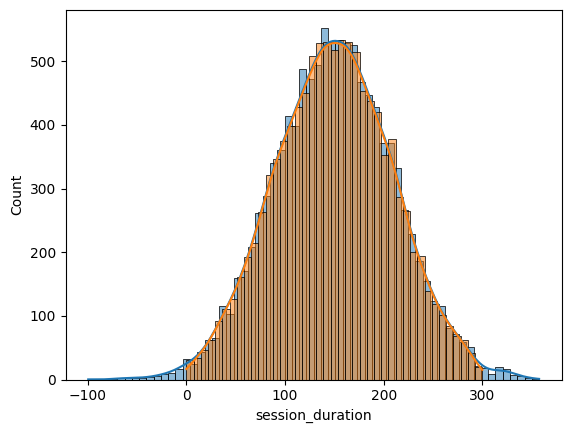

In [25]:
drop_outliers_performance('session_duration', 0, 300)

It follows from the data that the user spent a **negative time in the session**, which is essentially nonsense. Since it is not yet known reliably how to fight outliers, I will **temporarily** correct this error by **entering in the place of unreliable data NaN**.

#### PCT_DOUBLECLICK

Count replaced with NaN: 0.0409356689%.


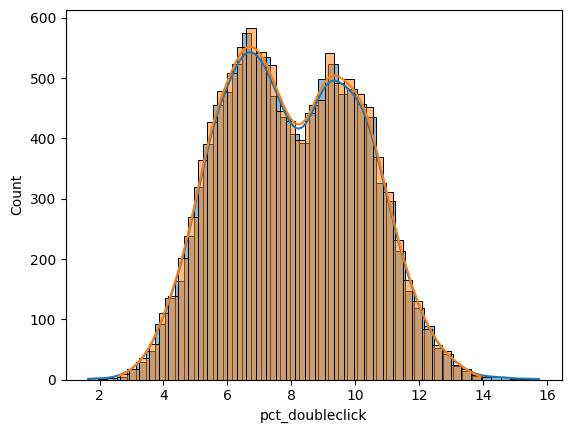

In [26]:
drop_outliers_performance('pct_doubleclick', 2.5, 14)

#### SCROLL_MOVE_TOTAL_REL_DISTANCE

Count replaced with NaN: 0.0265513045%.


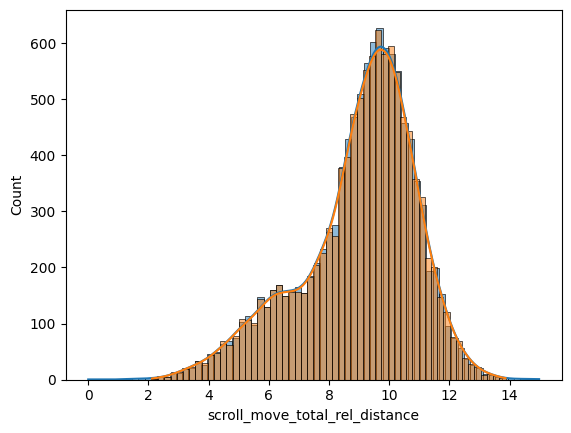

In [27]:
drop_outliers_performance('scroll_move_total_rel_distance', 2, 14)

#### PCT_CLICK

Count replaced with NaN: 0.0314842733%.


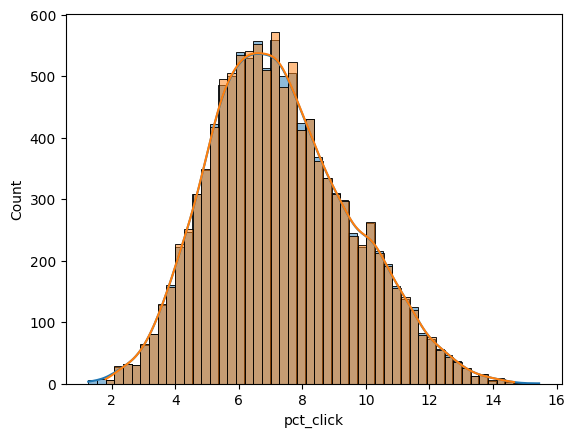

In [28]:
drop_outliers_performance('pct_click', 1.8, 14.8)

#### MOUSE_MOVE_TOTAL_REL_DISTANCE

Count replaced with NaN: 0.0354751368%.


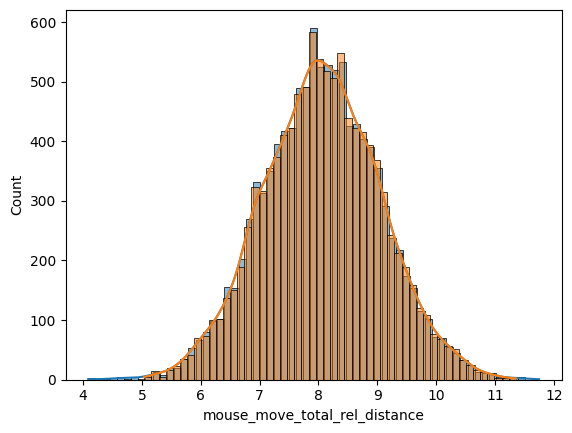

In [29]:
drop_outliers_performance('mouse_move_total_rel_distance', 5, 11.4)

#### PCT_MOUSE_CLICK

Count replaced with NaN: 0.0251765476%.


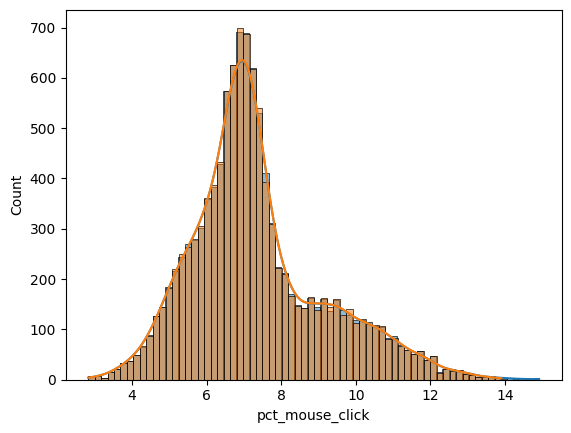

In [30]:
drop_outliers_performance('pct_mouse_click', 2.5, 14)

#### PAGE_ACTIVITY_DURATION

Count replaced with NaN: 0.0157408636%.


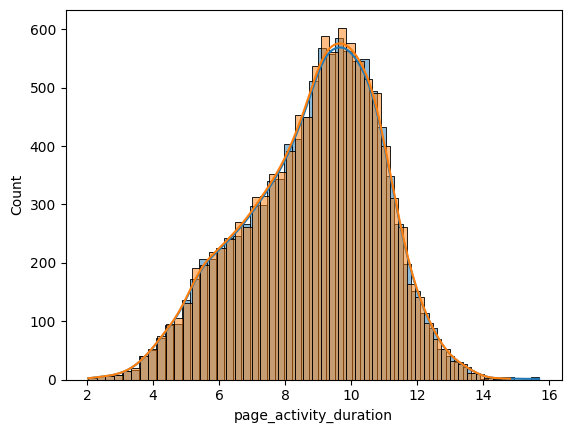

In [31]:
drop_outliers_performance('page_activity_duration', 2, 15)

#### BROWSER_NAME

<Axes: xlabel='browser_name', ylabel='Count'>

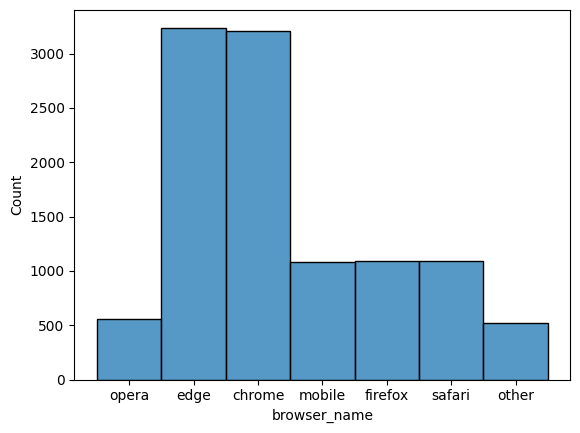

In [32]:
sns.histplot(session['browser_name'], kde=False)

### CONCLUSION IN OUTLAYER CORRECTION

Our goal was to partially clean up the dataset, so we did just that. In total, we cleaned the following number of rows:

In [33]:
print(f"Count of dropped: {counter_of_dropped_data}.\n Percentage: {counter_of_dropped_data / session_size * 100:.4f}%")
session

Count of dropped: 297.
 Percentage: 0.0136%


,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,pct_click,browser_name,pct_mouse_move,pct_click_product_info,...,pct_rage_click,scroll_move_total_rel_distance,user_id,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration,screen_resolution
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,6.95057,opera,6.03169,50.59959,...,27.21166,6.09851,868,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376,lower x 1080
1,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,7.19415,edge,5.84443,49.93366,...,47.46144,5.79315,1959,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608,lower x 768
2,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,9.56752,chrome,8.75647,32.96224,...,45.16742,9.26782,1587,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936,1280 x 1080
3,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,7.21841,mobile,5.68521,56.01077,...,51.15321,12.26355,2476,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937,1366 x 1024
4,6.10629,1.60295,8.34195,2019-12-26 10:34:30,1119598,0.0,7.92838,edge,7.76429,36.39425,...,55.01870,11.45785,16,0.88883,10.05772,8377930285275,62.92456,57.14864,9.85068,1024 x higher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10787,8.90701,3.24156,8.19275,2021-07-17 19:12:18,891391,1.0,8.86332,safari,9.86641,43.71919,...,49.90961,10.34860,681,0.08068,9.30304,2632912096956,47.04046,79.22789,5.91648,1366 x higher
10788,8.06033,8.88865,7.53117,2022-04-08 01:42:18,263847,0.0,5.16977,mobile,8.28987,76.86145,...,39.86244,5.79656,445,1.04892,7.14042,2516168790601,56.63606,49.23994,10.07923,1280 x 768
10789,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,11.54376,mobile,11.46814,44.09592,...,35.09946,7.35456,1688,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022,1024 x 768
10790,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,4.38175,chrome,9.94778,60.98057,...,57.69495,8.65941,755,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471,1920 x 800


### DUPLICATES PROBLEMS

In [34]:
duplicates_session_count = session.apply(lambda x: x.duplicated().sum())
#duplicates_session_count

In [35]:
session = session.drop_duplicates(keep='first')
#session

### RESULT :

In [36]:
session

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,pct_click,browser_name,pct_mouse_move,pct_click_product_info,...,pct_rage_click,scroll_move_total_rel_distance,user_id,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration,screen_resolution
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,6.95057,opera,6.03169,50.59959,...,27.21166,6.09851,868,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376,lower x 1080
1,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,7.19415,edge,5.84443,49.93366,...,47.46144,5.79315,1959,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608,lower x 768
2,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,9.56752,chrome,8.75647,32.96224,...,45.16742,9.26782,1587,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936,1280 x 1080
3,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,7.21841,mobile,5.68521,56.01077,...,51.15321,12.26355,2476,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937,1366 x 1024
4,6.10629,1.60295,8.34195,2019-12-26 10:34:30,1119598,0.0,7.92838,edge,7.76429,36.39425,...,55.01870,11.45785,16,0.88883,10.05772,8377930285275,62.92456,57.14864,9.85068,1024 x higher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10786,7.51957,3.00637,7.02760,2022-04-17 11:26:23,424834,1.0,8.77933,edge,10.04616,78.76740,...,31.46144,9.95534,2206,0.76442,5.51938,9072355322039,41.86458,70.24703,9.79886,higher x 1080
10787,8.90701,3.24156,8.19275,2021-07-17 19:12:18,891391,1.0,8.86332,safari,9.86641,43.71919,...,49.90961,10.34860,681,0.08068,9.30304,2632912096956,47.04046,79.22789,5.91648,1366 x higher
10789,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,11.54376,mobile,11.46814,44.09592,...,35.09946,7.35456,1688,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022,1024 x 768
10790,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,4.38175,chrome,9.94778,60.98057,...,57.69495,8.65941,755,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471,1920 x 800


## PRODUCT ALALYSING

In [37]:
product

,product_ean,code,store_name,location
0,4309748882180,US,Tyler,America/Chicago
1,5851941655164,PK,Alipur,Asia/Karachi
2,5289124458231,MY,Kampung Ayer Molek,Asia/Kuala_Lumpur
3,6565130443652,US,Glendale,America/Los_Angeles
4,8081875346334,PH,Naga,Asia/Manila
...,...,...,...,...
14953,6077115675137,US,Fairview Heights,America/Chicago
14954,8549791867352,DE,Ehingen,Europe/Berlin
14955,8931618033734,RU,Tyoply Stan,Europe/Moscow
14956,3259372694448,RU,Mikhaylovka,Europe/Volgograd


In [38]:
product[['region', 'city']] = product['location'].str.split('/', n=1, expand=True)
product = product.drop(['store_name', 'location'], axis=1)
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


### NAN PROBLEMS

In [39]:
product.isna().sum()

product_ean     0
code           17
region          0
city            0
dtype: int64

In [40]:
product = product.dropna()
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


### OUTLAYER PROBLEMS

### DUPLICATES PROBLEMS

In [41]:
product = product.drop_duplicates(keep='first')

In [42]:
product['product_ean'].duplicated().sum()

0

In [43]:
product['region'].duplicated().sum()
uniq_reg = product['region'].unique()
uniq_reg

array(['America', 'Asia', 'Europe', 'Africa', 'Australia', 'Pacific',
       'Atlantic', 'Indian'], dtype=object)

In [44]:
matching_rows = product[product['region'] == 'Pacific']
matching_rows

,product_ean,code,region,city
35,1920866758589,NZ,Pacific,Auckland
155,6059445329478,US,Pacific,Honolulu
233,3614297309547,PG,Pacific,Port_Moresby
326,7737036803567,PG,Pacific,Port_Moresby
472,4172859785264,NZ,Pacific,Auckland
...,...,...,...,...
14289,8301916139047,NZ,Pacific,Auckland
14404,6407588828219,PG,Pacific,Port_Moresby
14427,4981889226957,PG,Pacific,Port_Moresby
14512,4617494512528,US,Pacific,Honolulu


<Axes: xlabel='region', ylabel='Count'>

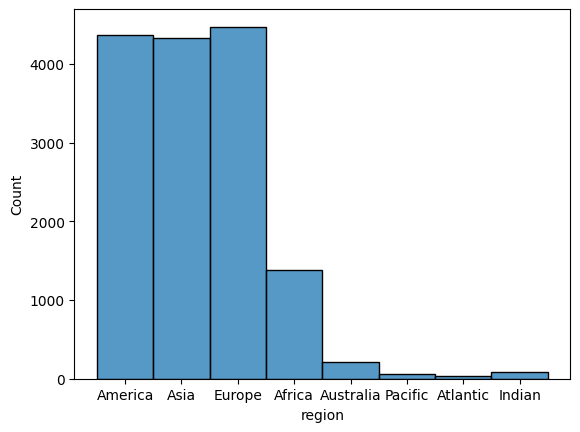

In [45]:
sns.histplot(product['region'])

In [46]:
def check_count_of_region_attr(region):
    attribute_counts = product['region'].value_counts()
    count_of_defined_attribute = attribute_counts.get(region, 0)
    return f"{region}: {count_of_defined_attribute} times."

for region in uniq_reg:
    print(check_count_of_region_attr(region))

America: 4373 times.
Asia: 4329 times.
Europe: 4474 times.
Africa: 1376 times.
Australia: 210 times.
Pacific: 61 times.
Atlantic: 38 times.
Indian: 80 times.


### RESULT :

In [47]:
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


## CONCLUSION. WHAT WAS CHANGED?

In [48]:
user_start = pd.read_csv("dataset_iau/user.csv", sep='\t')
session_start = pd.read_csv("dataset_iau/session.csv", sep='\t')
product_start = pd.read_csv("dataset_iau/product.csv", sep='\t')

In [49]:
user_start.head()

,residence,sex,username,user_id,address,birthdate,race,job,name,current_location,mail
0,NaN,F,vigorellimatilda,295,"Borgo Gelsomina, 3 Piano 9\n12013, Chiusa Di P...",1917-03-25,NaN,NaN,Gemma Baracca,NaN,cesarecagnotto@tim.it
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,matsumotoasuka,298,三重県西東京市上広谷3丁目27番1号,NaN,NaN,演歌歌手,近藤 翼,"(Decimal('44.4329015'), Decimal('-94.188145'))",nakajimaatsushi@yahoo.com
2,"68187 Matthews Turnpike Suite 738\nWhitebury, ...",F,debra19,591,"63067 Jeffrey Village\nEast Jeffrey, TX 08868",1985-05-21,white,Tourism officer,Belinda Harvey,"(Decimal('17.674891'), Decimal('43.063751'))",kevindeleon@yahoo.com
3,"Canale Majorana, 522\n98168, Villaggio Annunzi...",NaN,udineseimelda,2538,NaN,2012-01-02,asian,NaN,Sig.ra Susanna Roero,"(Decimal('-65.4578585'), Decimal('-162.734373'))",federicacaccioppoli@tele2.it
4,NaN,NaN,debra72,590,USCGC Kim\nFPO AA 25581,NaN,white,NaN,Deborah Larson,"(Decimal('-67.907028'), Decimal('-104.061594'))",stevendavis@yahoo.com


In [50]:
user_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   residence         890 non-null    object
 1   sex               1271 non-null   object
 2   username          2542 non-null   object
 3   user_id           2542 non-null   int64 
 4   address           2161 non-null   object
 5   birthdate         1398 non-null   object
 6   race              763 non-null    object
 7   job               1017 non-null   object
 8   name              2542 non-null   object
 9   current_location  2415 non-null   object
 10  mail              2542 non-null   object
dtypes: int64(1), object(10)
memory usage: 218.6+ KB


In [51]:
user.head()

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\n12013, Chiusa Di P...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,"68187 Matthews Turnpike Suite 738\nWhitebury, ...",F,591,"63067 Jeffrey Village\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\n98168, Villaggio Annunzi...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN


In [52]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2467 entries, 0 to 2541
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   residence         888 non-null    object 
 1   sex               1267 non-null   object 
 2   user_id           2467 non-null   int64  
 3   address           2141 non-null   object 
 4   current_location  2374 non-null   object 
 5   age               1393 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 134.9+ KB


In [53]:
session_start.head()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937


In [54]:
session_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11078 non-null  float64
 1   total_load_time                 11089 non-null  float64
 2   mouse_move_total_rel_distance   11078 non-null  float64
 3   session_start                   11089 non-null  object 
 4   session_id                      11089 non-null  int64  
 5   ack                             11089 non-null  float64
 6   screen_width                    11089 non-null  object 
 7   pct_click                       11078 non-null  float64
 8   browser_name                    11089 non-null  object 
 9   pct_mouse_move                  11078 non-null  float64
 10  pct_click_product_info          11078 non-null  float64
 11  pct_scroll_move_duration        11078 non-null  float64
 12  pct_scrandom                    

In [55]:
session.head()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,pct_click,browser_name,pct_mouse_move,pct_click_product_info,...,pct_rage_click,scroll_move_total_rel_distance,user_id,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration,screen_resolution
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,6.95057,opera,6.03169,50.59959,...,27.21166,6.09851,868,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376,lower x 1080
1,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,7.19415,edge,5.84443,49.93366,...,47.46144,5.79315,1959,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608,lower x 768
2,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,9.56752,chrome,8.75647,32.96224,...,45.16742,9.26782,1587,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936,1280 x 1080
3,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,7.21841,mobile,5.68521,56.01077,...,51.15321,12.26355,2476,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937,1366 x 1024
4,6.10629,1.60295,8.34195,2019-12-26 10:34:30,1119598,0.0,7.92838,edge,7.76429,36.39425,...,55.01870,11.45785,16,0.88883,10.05772,8377930285275,62.92456,57.14864,9.85068,1024 x higher


In [56]:
session.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10662 entries, 0 to 10791
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 10662 non-null  float64
 1   total_load_time                 10662 non-null  float64
 2   mouse_move_total_rel_distance   10662 non-null  float64
 3   session_start                   10662 non-null  object 
 4   session_id                      10662 non-null  int64  
 5   ack                             10662 non-null  float64
 6   pct_click                       10662 non-null  float64
 7   browser_name                    10662 non-null  object 
 8   pct_mouse_move                  10651 non-null  float64
 9   pct_click_product_info          10651 non-null  float64
 10  pct_scroll_move_duration        10651 non-null  float64
 11  pct_scrandom                    10652 non-null  float64
 12  session_duration                10662

In [57]:
product_start.head()

,product_ean,code,store_name,location
0,4309748882180,US,Tyler,America/Chicago
1,5851941655164,PK,Alipur,Asia/Karachi
2,5289124458231,MY,Kampung Ayer Molek,Asia/Kuala_Lumpur
3,6565130443652,US,Glendale,America/Los_Angeles
4,8081875346334,PH,Naga,Asia/Manila


In [58]:
product_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14958 entries, 0 to 14957
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_ean  14958 non-null  int64 
 1   code         14941 non-null  object
 2   store_name   14958 non-null  object
 3   location     14958 non-null  object
dtypes: int64(1), object(3)
memory usage: 467.6+ KB


In [59]:
product.head()

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila


In [60]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14941 entries, 0 to 14957
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_ean  14941 non-null  int64 
 1   code         14941 non-null  object
 2   region       14941 non-null  object
 3   city         14941 non-null  object
dtypes: int64(1), object(3)
memory usage: 583.6+ KB


# SINGLE ATTRIBUTE ANALYSIS

We are going to analyse these attributes:

**Numeric attributes**

1. session.session_duration
2. session.page_activity_duration
3. session.pct_mouse_click
4. session.mouse_move_total_rel_distance
5. session.scroll_move_total_rel_distance

**Categorical attributes**

1. session.screen_resolution
2. user.age
3. user.sex
4. product.code
5. session.browser_name

### Numeric attributes
We analysed the attributes' quartiles, means, modes, medians, variations, skewness, kurtosis, plotted their distributions and checked, whether they belonged to a normal distribution. In the last bit, we encountered a problem, when the plots look like plots of normal distributions, but the most the tests say otherwise (though with suspiciously similar results). That is most likely caused by the removal values in the preprocessing stage.

#### session.session_duration

In [61]:
session['session_duration'].describe()

count    10662.000000
mean       149.589389
std         57.638011
min          0.001910
25%        108.728675
50%        149.844055
75%        189.973318
max        299.855910
Name: session_duration, dtype: float64

In [62]:
session['session_duration'].median()

149.84405500000003

In [63]:
stats.mode(session['session_duration'])

ModeResult(mode=103.00098, count=2)

In [64]:
np.var(session['session_duration'])

3321.828724630655

In [65]:
stats.skew(session.session_duration)

0.0025419948825967913

In [66]:
stats.kurtosis(session.session_duration)

-0.3939163662459366

<Axes: >

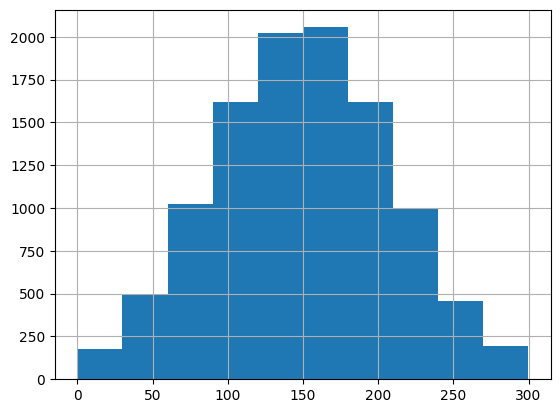

In [67]:
session['session_duration'].hist()

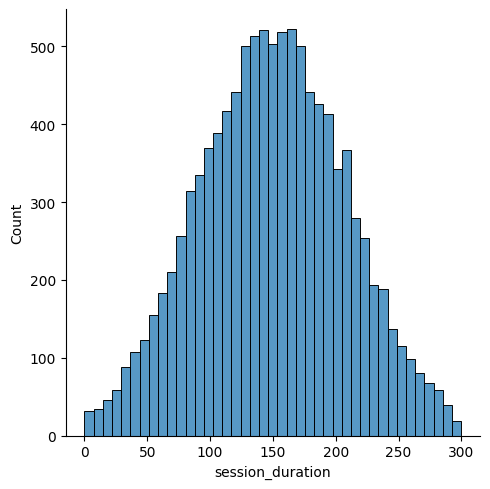

In [68]:
sns.displot(session.session_duration)

In [69]:
shapiro_test_session_duration = shapiro(session.session_duration)
print('p-value: ', shapiro_test_session_duration.pvalue)
if shapiro_test_session_duration.pvalue > 0.05:
    print('session_duration likely belongs to a normal distribution')
else:
    print('session_duration likely belongs to a distribution different to normal')

p-value:  6.463948977854586e-14
session_duration likely belongs to a distribution different to normal


C:\Users\matej\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As suggested by the warning, this appears to be a wrong conclusion (the graph looks like it is coming from a normal distribution). We will perfrom more statistical tests:

In [70]:
stats.anderson(session.session_duration, dist='norm')

AndersonResult(statistic=2.9670734335777524, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=149.58938895423, scale=57.63801099625289)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

This test suggests a normal distributon.

In [71]:
stats.kstest(session.session_duration, 'norm')

KstestResult(statistic=0.9979903448632057, pvalue=0.0, statistic_location=3.94414, statistic_sign=-1)

Session.session_duration does not seem to belong to a normal distribution. This is probably caused by removing certain values from the dataset, such as outliers.

#### session.page_activity_duration

In [72]:
session['page_activity_duration'].describe()

count    10662.000000
mean         8.824277
std          2.050625
min          2.031710
25%          7.443437
50%          9.109535
75%         10.328667
max         14.819500
Name: page_activity_duration, dtype: float64

In [73]:
session['page_activity_duration'].median()

9.109535000000001

In [74]:
stats.mode(session['page_activity_duration'])

ModeResult(mode=6.04174, count=2)

In [75]:
np.var(session['page_activity_duration'])

4.204669785370725

In [76]:
stats.skew(session.page_activity_duration)

-0.3868325054347587

In [77]:
stats.kurtosis(session.page_activity_duration)

-0.3175340690507489

<Axes: >

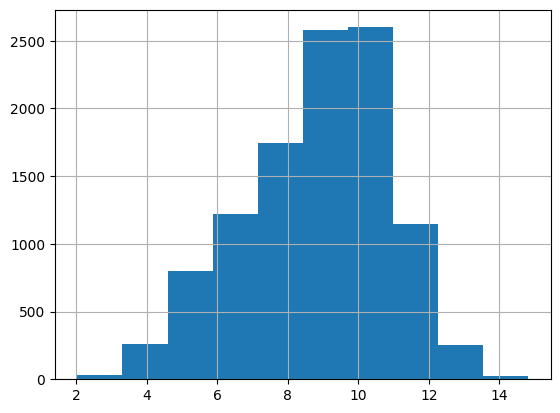

In [78]:
session['page_activity_duration'].hist()

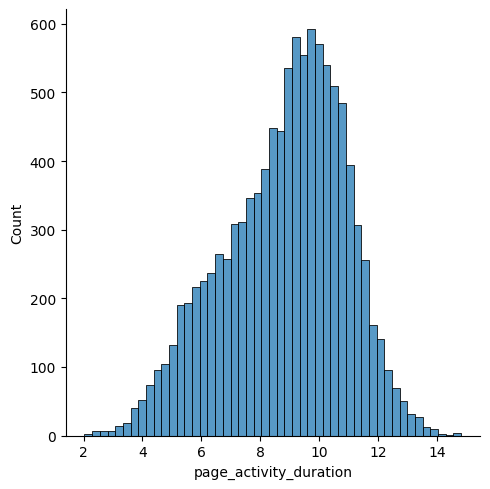

In [79]:
sns.displot(session.page_activity_duration)

In [80]:
shapiro_test_page_activity_duration = shapiro(session.page_activity_duration)
print('p-value: ', shapiro_test_page_activity_duration.pvalue)
if shapiro_test_page_activity_duration.pvalue > 0.05:
    print('page_activity_duration likely belongs to a normal distribution')
else:
    print('page_activity_duration likely belongs to a distribution different to normal')

p-value:  8.975491523807392e-33
page_activity_duration likely belongs to a distribution different to normal


C:\Users\matej\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [81]:
stats.anderson(session.page_activity_duration, dist='norm')

AndersonResult(statistic=60.46561175346869, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.82427717595198, scale=2.050625315040921)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Normal distribution.

In [82]:
stats.kstest(session.page_activity_duration, 'norm')

KstestResult(statistic=0.9969377832752003, pvalue=0.0, statistic_location=3.11975, statistic_sign=-1)

Not a normal distribution.

#### session.pct_mouse_click

In [83]:
session['pct_mouse_click'].describe()

count    10662.000000
mean         7.342956
std          1.789575
min          2.821160
25%          6.221007
50%          7.035725
75%          8.150237
max         13.899250
Name: pct_mouse_click, dtype: float64

In [84]:
session['pct_mouse_click'].median()

7.035724999999999

In [85]:
stats.mode(session['pct_mouse_click'])

ModeResult(mode=4.09732, count=2)

In [86]:
np.var(session['pct_mouse_click'])

3.2022773121160726

In [87]:
stats.skew(session.pct_mouse_click)

0.7629499250755357

In [88]:
stats.kurtosis(session.pct_mouse_click)

0.5036117387076628

<Axes: >

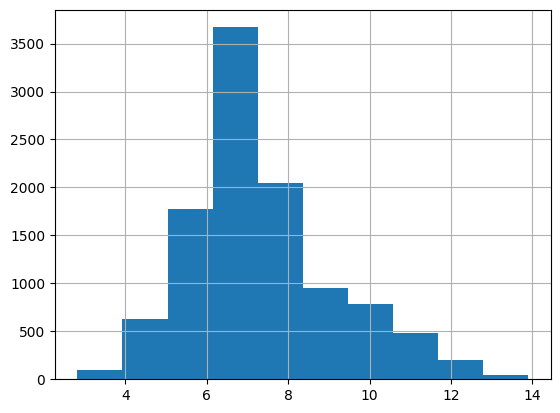

In [89]:
session['pct_mouse_click'].hist()

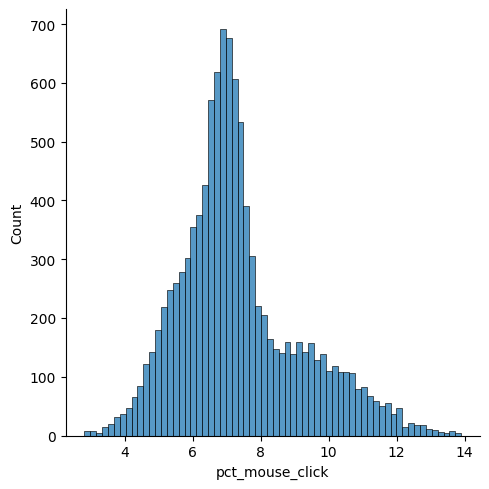

In [90]:
sns.displot(session.pct_mouse_click)

In [91]:
shapiro_test_pct_mouse_click = shapiro(session.pct_mouse_click)
print('p-value: ', shapiro_test_pct_mouse_click.pvalue)
if shapiro_test_pct_mouse_click.pvalue > 0.05:
    print('pct_mouse_click likely belongs to a normal distribution')
else:
    print('pct_mouse_click likely belongs to a distribution different to normal')

p-value:  0.0
pct_mouse_click likely belongs to a distribution different to normal


C:\Users\matej\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [92]:
stats.anderson(session.pct_mouse_click, dist='norm')

AndersonResult(statistic=176.9815586776076, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=7.342955511161134, scale=1.7895747218787141)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Normal distribution.

In [93]:
stats.kstest(session.pct_mouse_click, 'norm')

KstestResult(statistic=0.9981256044859667, pvalue=0.0, statistic_location=3.14071, statistic_sign=-1)

Not a normal distribution.

#### session.mouse_move_total

In [94]:
session['mouse_move_total_rel_distance'].describe()

count    10662.000000
mean         8.060307
std          0.989459
min          5.039260
25%          7.384510
50%          8.054750
75%          8.729755
max         11.356270
Name: mouse_move_total_rel_distance, dtype: float64

In [95]:
session['mouse_move_total_rel_distance'].median()

8.054749999999999

In [96]:
stats.mode(session['mouse_move_total_rel_distance'])

ModeResult(mode=8.46091, count=3)

In [97]:
np.var(session['mouse_move_total_rel_distance'])

0.9789369944728199

In [98]:
stats.skew(session.mouse_move_total_rel_distance)

0.030860506933154713

In [99]:
stats.kurtosis(session.mouse_move_total_rel_distance)

-0.11086024230458635

<Axes: >

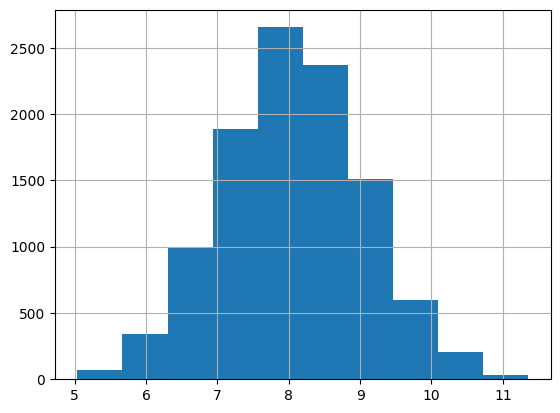

In [100]:
session['mouse_move_total_rel_distance'].hist()

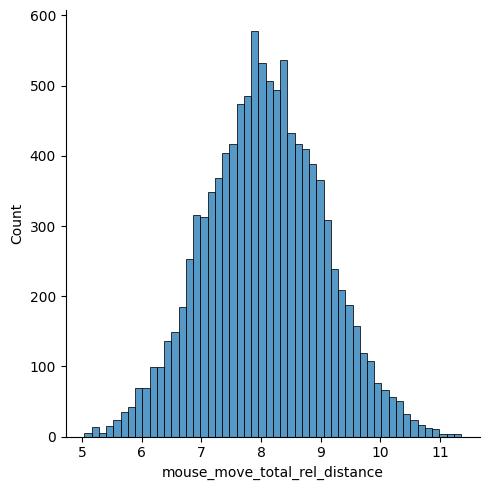

In [101]:
sns.displot(session.mouse_move_total_rel_distance)

In [102]:
shapiro_test_mouse_move_total_rel_distance = shapiro(session.mouse_move_total_rel_distance)
print('p-value: ', shapiro_test_mouse_move_total_rel_distance.pvalue)
if shapiro_test_mouse_move_total_rel_distance.pvalue > 0.05:
    print('mouse_move_total_rel_distance likely belongs to a normal distribution')
else:
    print('mouse_move_total_rel_distance likely belongs to a distribution different to normal')

p-value:  0.0032885950058698654
mouse_move_total_rel_distance likely belongs to a distribution different to normal


C:\Users\matej\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [103]:
stats.anderson(session.mouse_move_total_rel_distance, dist='norm')

AndersonResult(statistic=0.4690539939838345, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.060307181579441, scale=0.9894588513918191)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [104]:
stats.kstest(session.mouse_move_total_rel_distance, 'norm')

KstestResult(statistic=0.9999997663323719, pvalue=0.0, statistic_location=5.03926, statistic_sign=-1)

#### session.scroll_move_total_rel_distance

In [105]:
session['scroll_move_total_rel_distance'].describe()

count    10662.000000
mean         8.988777
std          1.910360
min          2.119410
25%          7.993113
50%          9.345995
75%         10.292475
max         13.865950
Name: scroll_move_total_rel_distance, dtype: float64

In [106]:
session['scroll_move_total_rel_distance'].median()

9.345994999999998

In [107]:
stats.mode(session['scroll_move_total_rel_distance'])

ModeResult(mode=6.00813, count=2)

In [108]:
np.var(session['scroll_move_total_rel_distance'])

3.649132816440041

In [109]:
stats.skew(session.scroll_move_total_rel_distance)

-0.7449409332365828

In [110]:
stats.kurtosis(session.scroll_move_total_rel_distance)

0.298883299236016

<Axes: >

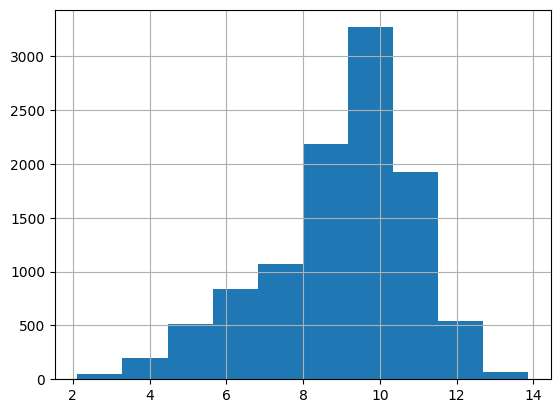

In [111]:
session['scroll_move_total_rel_distance'].hist()

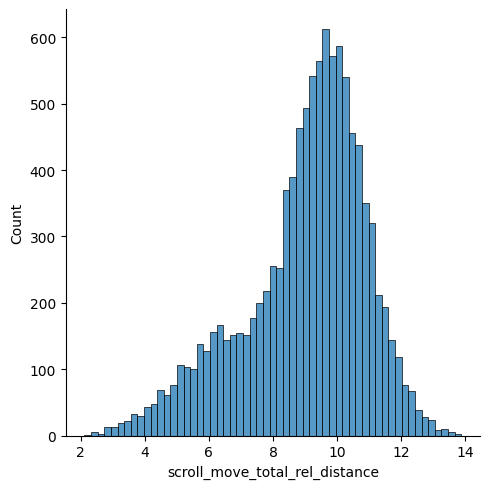

In [112]:
sns.displot(session.scroll_move_total_rel_distance)

In [113]:
shapiro_test_scroll_move_total_rel_distance = shapiro(session.scroll_move_total_rel_distance)
print('p-value: ', shapiro_test_scroll_move_total_rel_distance.pvalue)
if shapiro_test_scroll_move_total_rel_distance.pvalue > 0.05:
    print('scroll_move_total_rel_distance likely belongs to a normal distribution')
else:
    print('scroll_move_total_rel_distance likely belongs to a distribution different to normal')

p-value:  0.0
scroll_move_total_rel_distance likely belongs to a distribution different to normal


C:\Users\matej\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [114]:
stats.anderson(session.scroll_move_total_rel_distance, dist='norm')

AndersonResult(statistic=150.81768272711997, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.988776878634402, scale=1.9103599410797183)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [115]:
stats.kstest(session.scroll_move_total_rel_distance, 'norm')

KstestResult(statistic=0.9966018793188738, pvalue=0.0, statistic_location=2.865, statistic_sign=-1)

### Categorical attributes
These plots will show distributions of chosen categorical attributes.

#### session.screen_resolution

In [116]:
session['screen_resolution'].describe()

count           10662
unique             49
top       1920 x 1080
freq              464
Name: screen_resolution, dtype: object

In [117]:
session.groupby('screen_resolution').size()

screen_resolution
1024 x 1024        237
1024 x 1080        309
1024 x 600         249
1024 x 768         308
1024 x 800         246
1024 x higher       81
1024 x lower       155
1280 x 1024        295
1280 x 1080        423
1280 x 600         304
1280 x 768         422
1280 x 800         293
1280 x higher      100
1280 x lower       198
1366 x 1024        220
1366 x 1080        294
1366 x 600         270
1366 x 768         327
1366 x 800         271
1366 x higher       73
1366 x lower       169
1920 x 1024        315
1920 x 1080        464
1920 x 600         335
1920 x 768         452
1920 x 800         340
1920 x higher       78
1920 x lower       204
800 x 1024         244
800 x 1080         338
800 x 600          270
800 x 768          305
800 x 800          261
800 x higher        82
800 x lower        155
higher x 1024       74
higher x 1080      102
higher x 600        77
higher x 768       103
higher x 800        79
higher x higher     37
higher x lower      59
lower x 1024    

<Axes: xlabel='screen_resolution'>

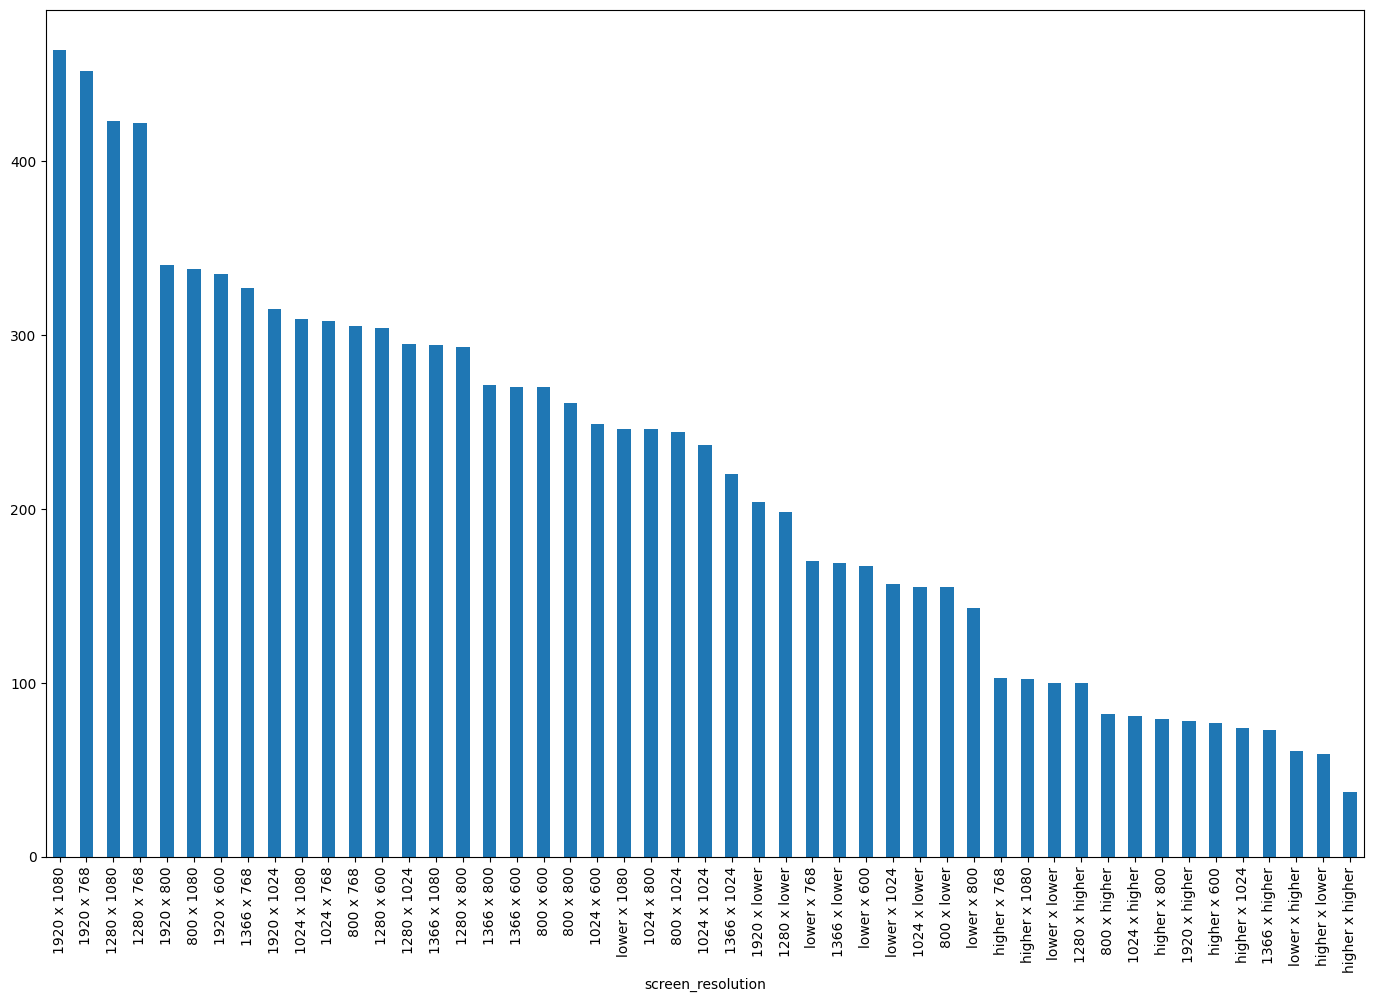

In [118]:
fig, ax = plt.subplots(figsize=(17,11))
session.screen_resolution.value_counts().plot(kind='bar', ax=ax)

#### user.age

In [119]:
user['age'].describe()

count    1393.000000
mean       57.701364
std        33.728162
min         0.000000
25%        28.000000
50%        58.000000
75%        87.000000
max       116.000000
Name: age, dtype: float64

In [120]:
user.groupby('age').size()

age
0.0      10
1.0      17
2.0       9
3.0      12
4.0      13
         ..
112.0    10
113.0     9
114.0    14
115.0    11
116.0     1
Length: 117, dtype: int64

<Axes: xlabel='age'>

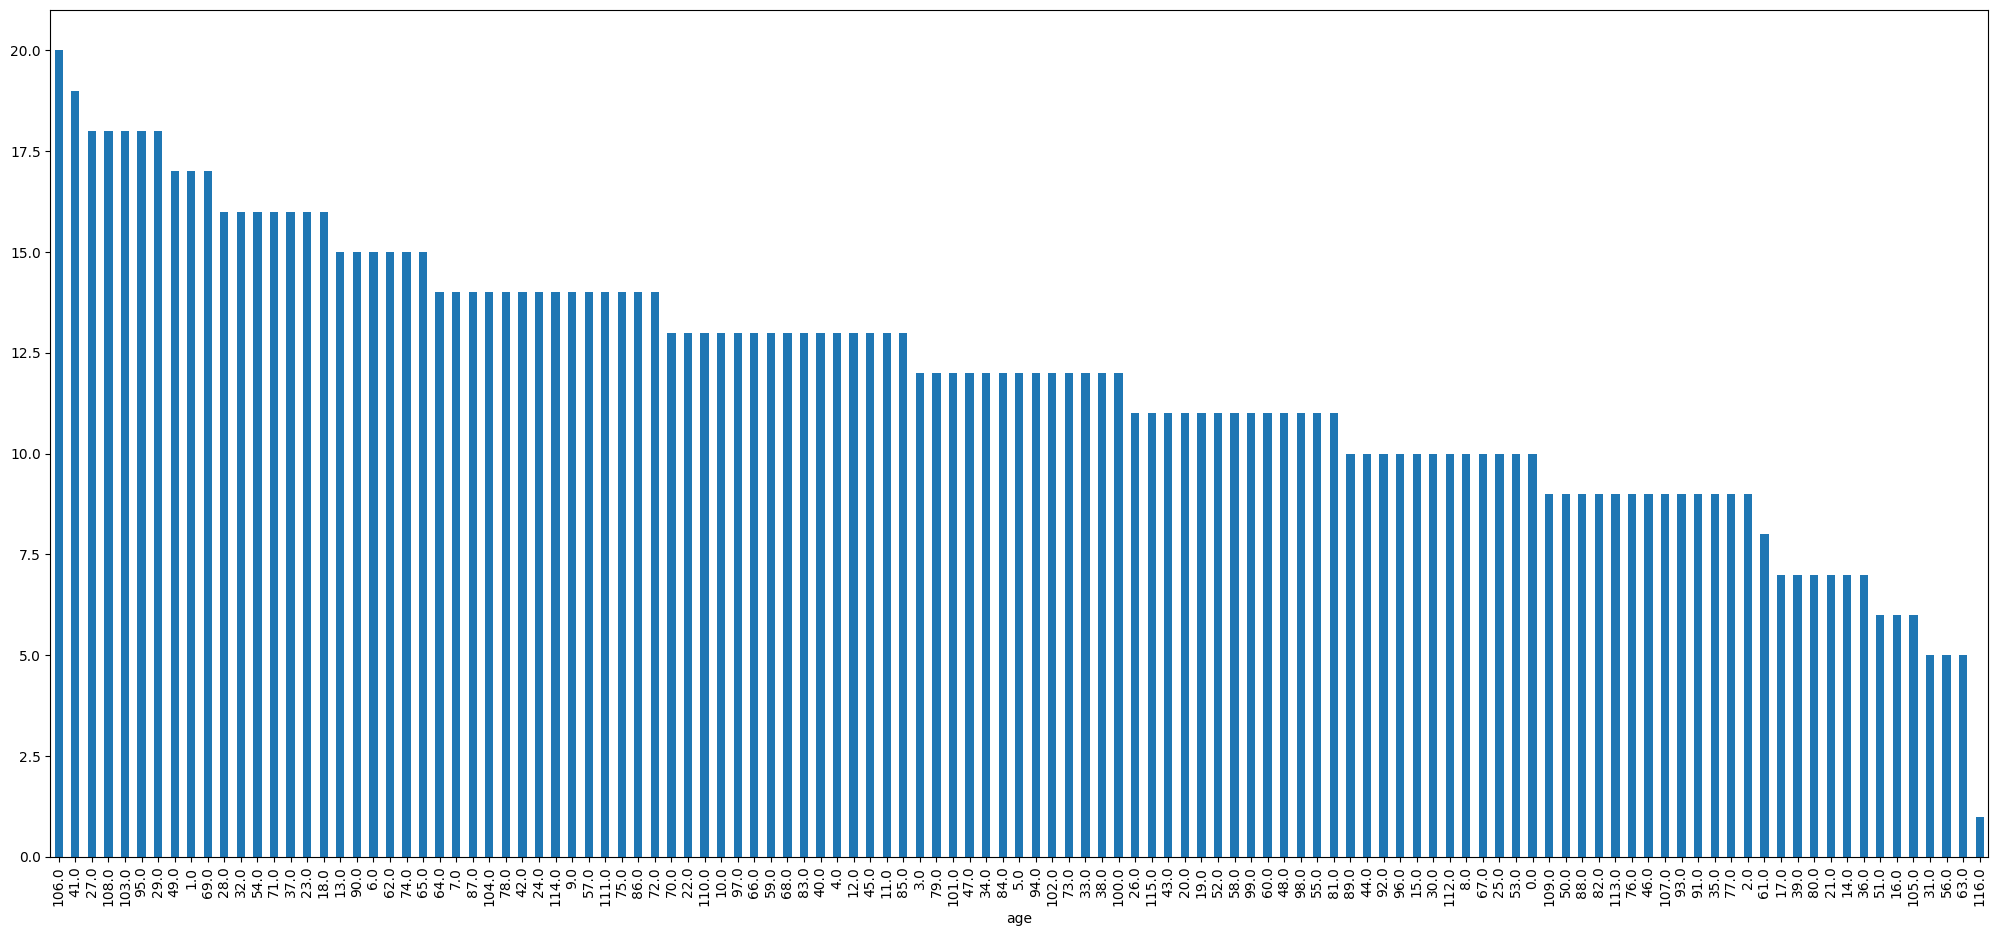

In [121]:
fig, ax = plt.subplots(figsize=(25,11))
user.age.value_counts().plot(kind='bar', ax=ax)

#### user.sex

In [122]:
user['sex'].describe()

count     1267
unique       2
top          F
freq       639
Name: sex, dtype: object

In [123]:
user.groupby('sex').size()

sex
F    639
M    628
dtype: int64

<Axes: xlabel='sex'>

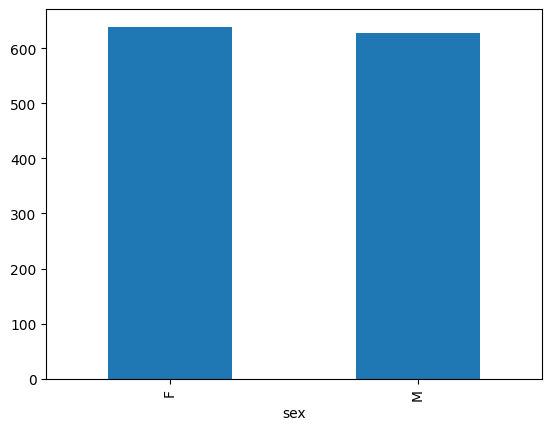

In [124]:
user.sex.value_counts().plot(kind='bar')

#### product.code

In [125]:
product['code'].describe()

count     14941
unique      133
top          US
freq       2457
Name: code, dtype: object

In [126]:
product.groupby('code').size()

code
AD     16
AF     14
AM     13
AO     13
AR    122
     ... 
VN     14
VU     11
XK     14
YE     18
ZA     52
Length: 133, dtype: int64

<Axes: xlabel='code'>

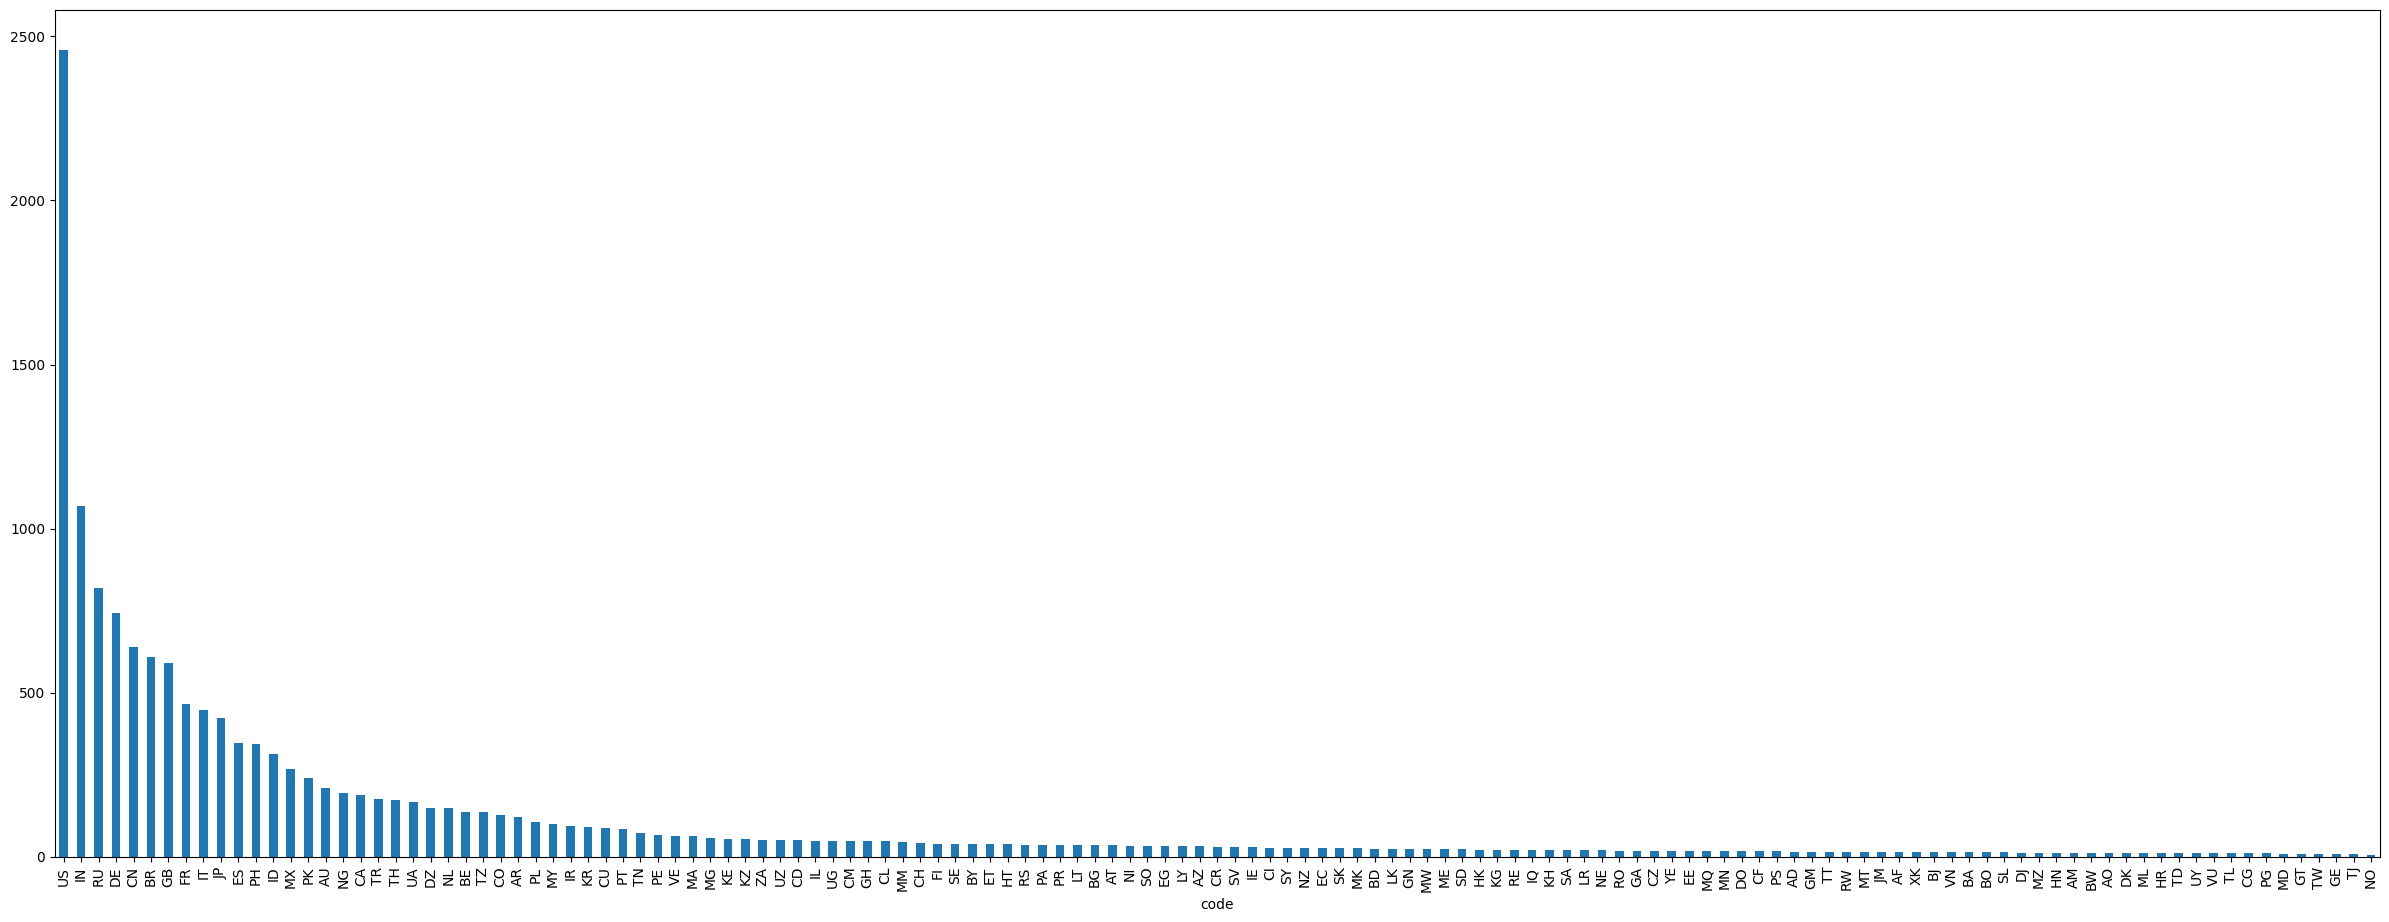

In [127]:
fig, ax = plt.subplots(figsize=(30,11))
product.code.value_counts().plot(kind='bar', ax=ax)

#### session.browser_name

In [128]:
session['browser_name'].describe()

count     10662
unique        7
top        edge
freq       3196
Name: browser_name, dtype: object

In [129]:
session.groupby('browser_name').size()

browser_name
chrome     3165
edge       3196
firefox    1076
mobile     1075
opera       553
other       517
safari     1080
dtype: int64

<Axes: xlabel='browser_name'>

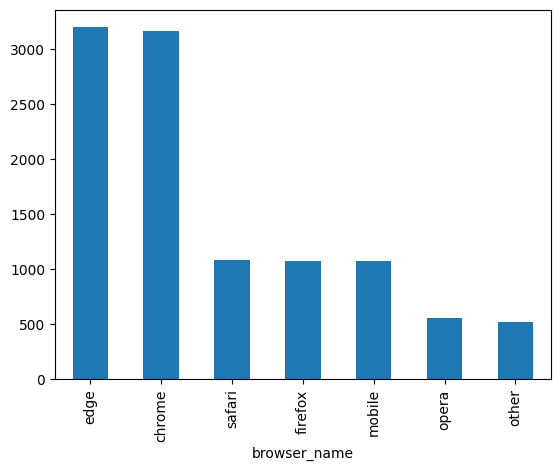

In [130]:
session.browser_name.value_counts().plot(kind='bar')

# PAIR ANALYSIS: IDENTIFING THE CORRELATION BETWEEN ATTRIBUTES

In this faze of the project, we decided to leave the age, sex and location/address of the users out of the analysis due to issue with the user dataset. The issues include:
* multiple users with the same user_id
* unstructured values in address/place of residence columns

In [131]:
# fig, ax = plt.subplots(figsize=(17,11))
# sns.heatmap(session.select_dtypes(exclude=['int64','object']).corr(), ax=ax, annot=True, fmt=".3f")

The heatmap shows correlations between the numeric (and the ack) attributes of the session file.

In this section, we are not going to analyse relationships regarding the 'ack' variable. <br>
Some of the highest/lowest correlations are between the following pairs of (non-ack) attributes:

* pct_mouse_click - pct_click
* pct_mouse_click - pct_mouse_move
* pct_mouse_click - wild_mouse_duration
* pct_click - page_activity_duration
* page_activity_duration - wild_mouse_duration

We will show (where possible) the pairs' correlation and plots showing it and their covariance.

#### pct_mouse_click - pct_click

In [132]:
pearsonr(session.pct_mouse_click, session.pct_click)

PearsonRResult(statistic=0.7205238294667061, pvalue=0.0)

In [133]:
cov(session.pct_mouse_click, session.pct_click)[0, 1]

2.8243579925325033

<Axes: xlabel='pct_mouse_click', ylabel='pct_click'>

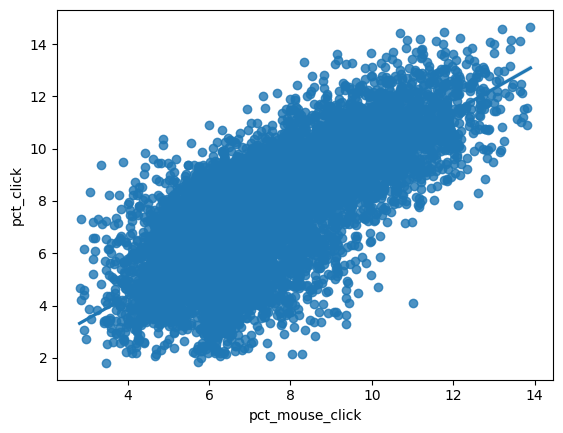

In [134]:
sns.regplot(data=session, x="pct_mouse_click", y="pct_click")

<Axes: xlabel='pct_mouse_click', ylabel='pct_click'>

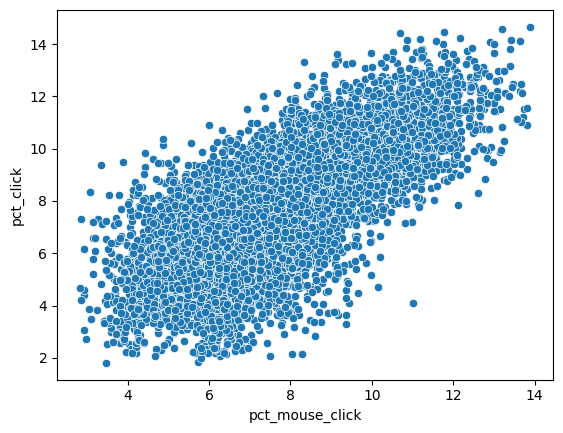

In [135]:
sns.scatterplot(data=session, x='pct_mouse_click', y='pct_click')

<Axes: xlabel='pct_mouse_click', ylabel='Count'>

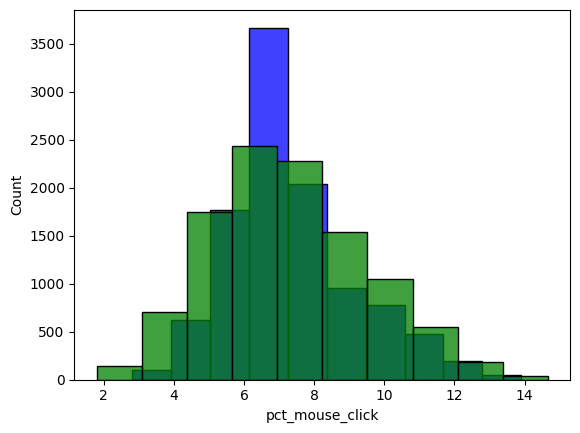

In [136]:
sns.histplot(session.pct_mouse_click, bins=10, color="blue")
sns.histplot(session.pct_click, bins=10, color="green")

#### pct_mouse_click - pct_mouse_move

In [137]:
# pearsonr(session.pct_mouse_click, session.pct_mouse_move)

In [138]:
# cov(session.pct_mouse_click, session.pct_mouse_move)[0, 1]

<Axes: xlabel='pct_mouse_click', ylabel='pct_mouse_move'>

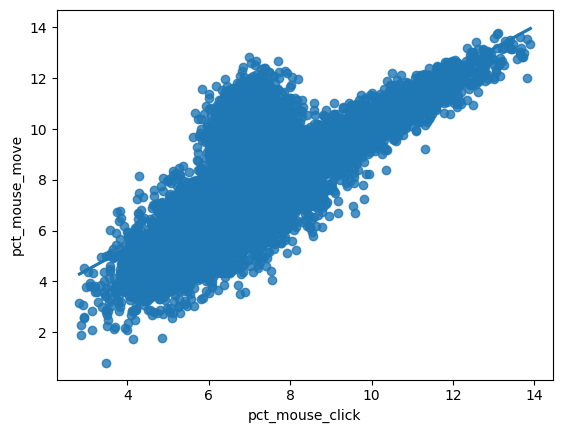

In [139]:
sns.regplot(data=session, x="pct_mouse_click", y="pct_mouse_move")

<Axes: xlabel='pct_mouse_click', ylabel='pct_mouse_move'>

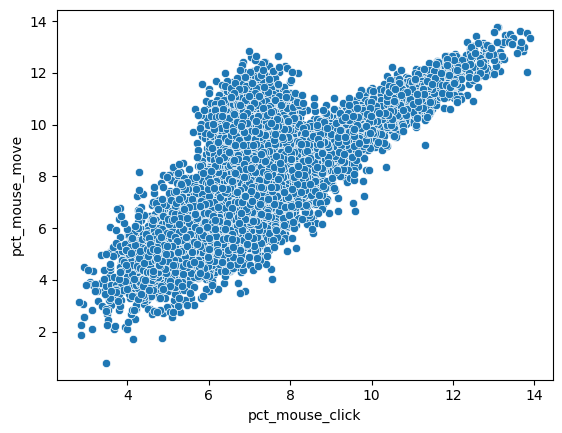

In [140]:
sns.scatterplot(data=session, x='pct_mouse_click', y='pct_mouse_move')

<Axes: xlabel='pct_mouse_click', ylabel='Count'>

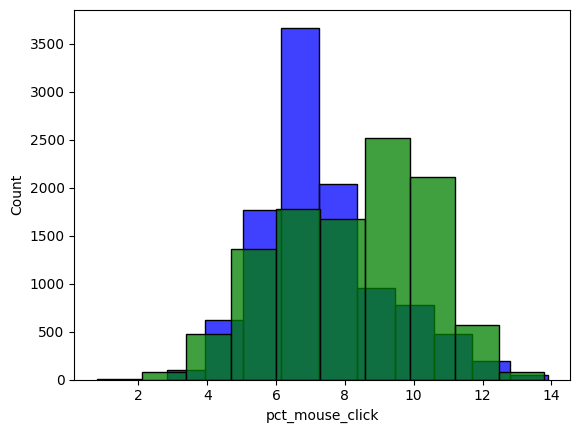

In [141]:
sns.histplot(session.pct_mouse_click, bins=10, color="blue")
sns.histplot(session.pct_mouse_move, bins=10, color="green")

#### pct_mouse_click - wild_mouse_duration

In [142]:
# pearsonr(session.pct_mouse_click, session.wild_mouse_duration)

In [143]:
# cov(session.pct_mouse_click, session.wild_mouse_duration)[0, 1]

<Axes: xlabel='pct_mouse_click', ylabel='wild_mouse_duration'>

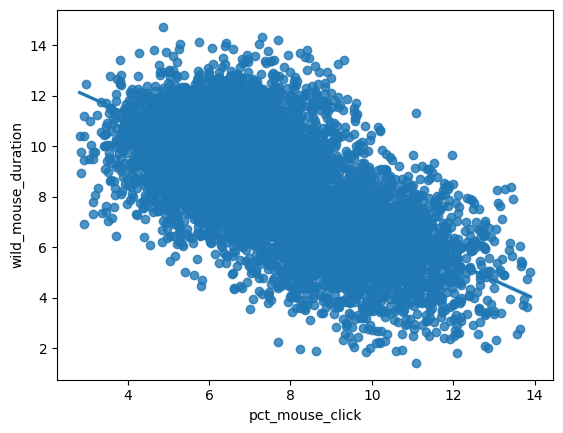

In [144]:
sns.regplot(data=session, x="pct_mouse_click", y="wild_mouse_duration")

<Axes: xlabel='pct_mouse_click', ylabel='wild_mouse_duration'>

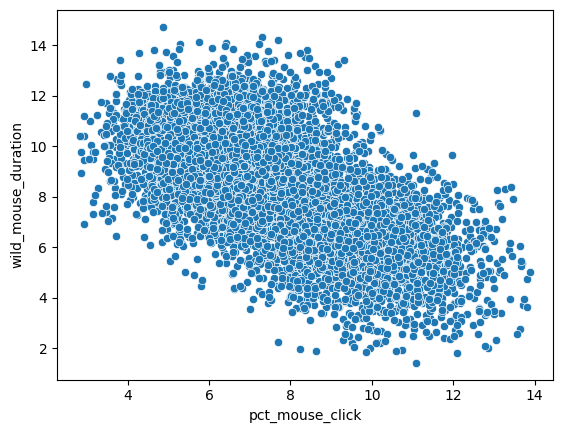

In [145]:
sns.scatterplot(data=session, x='pct_mouse_click', y='wild_mouse_duration')

<Axes: xlabel='pct_mouse_click', ylabel='Count'>

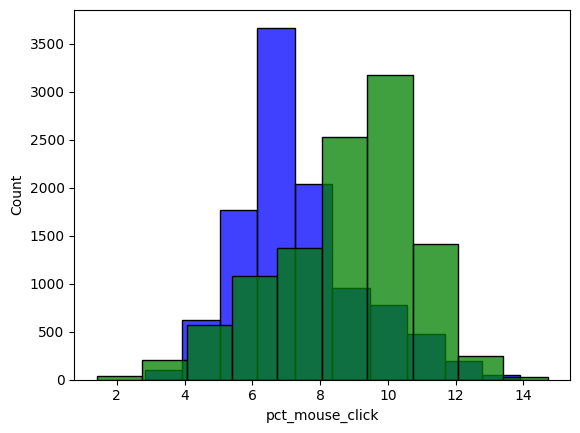

In [146]:
sns.histplot(session.pct_mouse_click, bins=10, color="blue")
sns.histplot(session.wild_mouse_duration, bins=10, color="green")

#### pct_click - page_activity_duration

In [147]:
pearsonr(session.page_activity_duration, session.pct_click)

PearsonRResult(statistic=-0.659099769902227, pvalue=0.0)

In [148]:
cov(session.page_activity_duration, session.pct_click)[0, 1]

-2.9604588769473454

<Axes: xlabel='page_activity_duration', ylabel='pct_click'>

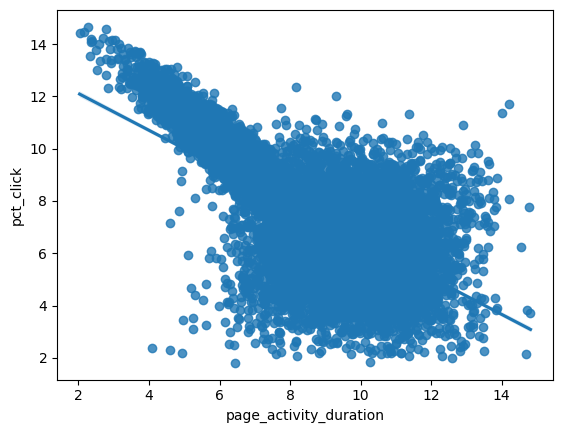

In [149]:
sns.regplot(data=session, x="page_activity_duration", y="pct_click")

<Axes: xlabel='page_activity_duration', ylabel='pct_click'>

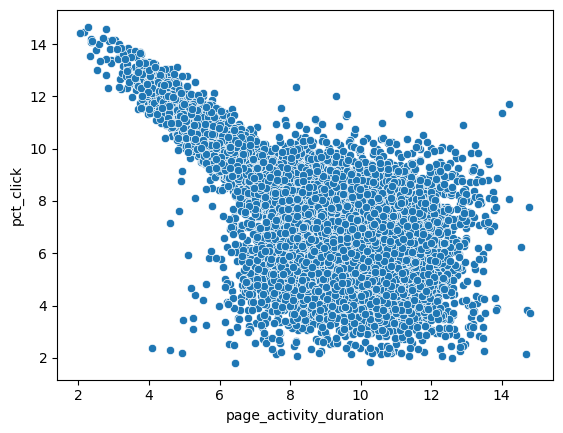

In [150]:
sns.scatterplot(data=session, x='page_activity_duration', y='pct_click')

<Axes: xlabel='page_activity_duration', ylabel='Count'>

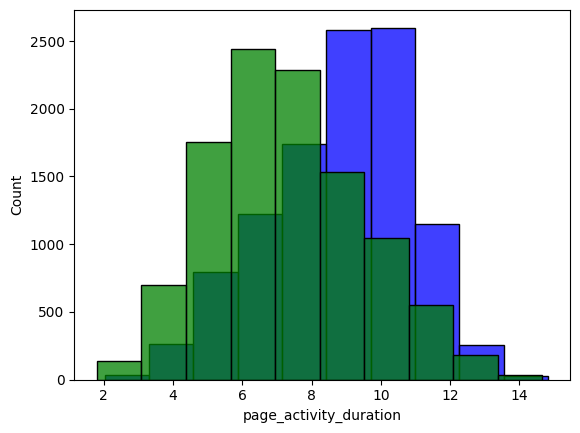

In [151]:
sns.histplot(session.page_activity_duration, bins=10, color="blue")
sns.histplot(session.pct_click, bins=10, color="green")

#### page_activity_duration - wild_mouse_duration

In [152]:
# pearsonr(session.page_activity_duration, session.wild_mouse_duration)

In [153]:
# cov(session.page_activity_duration, session.wild_mouse_duration)[0, 1]

<Axes: xlabel='page_activity_duration', ylabel='wild_mouse_duration'>

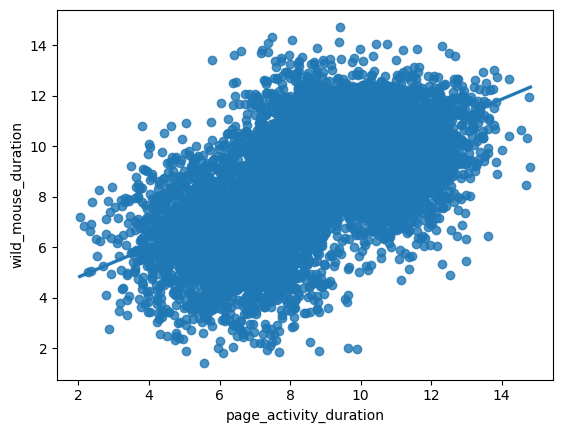

In [154]:
sns.regplot(data=session, x="page_activity_duration", y="wild_mouse_duration")

<Axes: xlabel='page_activity_duration', ylabel='wild_mouse_duration'>

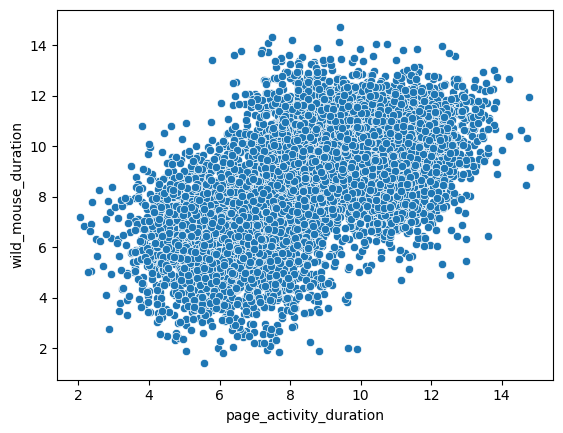

In [155]:
sns.scatterplot(data=session, x='page_activity_duration', y='wild_mouse_duration')

<Axes: xlabel='page_activity_duration', ylabel='Count'>

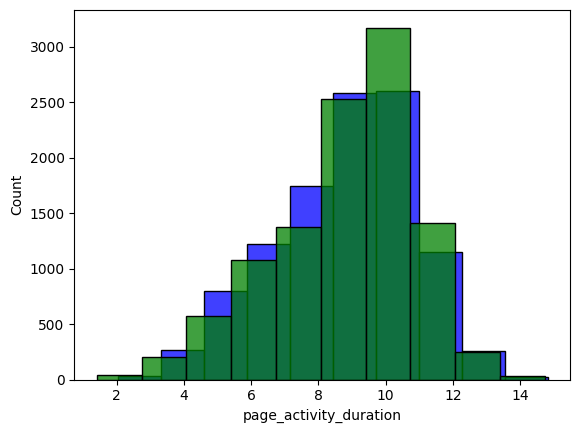

In [156]:
sns.histplot(session.page_activity_duration, bins=10, color="blue")
sns.histplot(session.wild_mouse_duration, bins=10, color="green")

### Relationships including non-numeric columns

Outside of the heatmap, we are also going to analyse the relationships between these pairs of attributes:
* pct_mouse_move - screen_resolution
* pct_rage_click - browser_name

<Axes: xlabel='pct_mouse_move', ylabel='screen_resolution'>

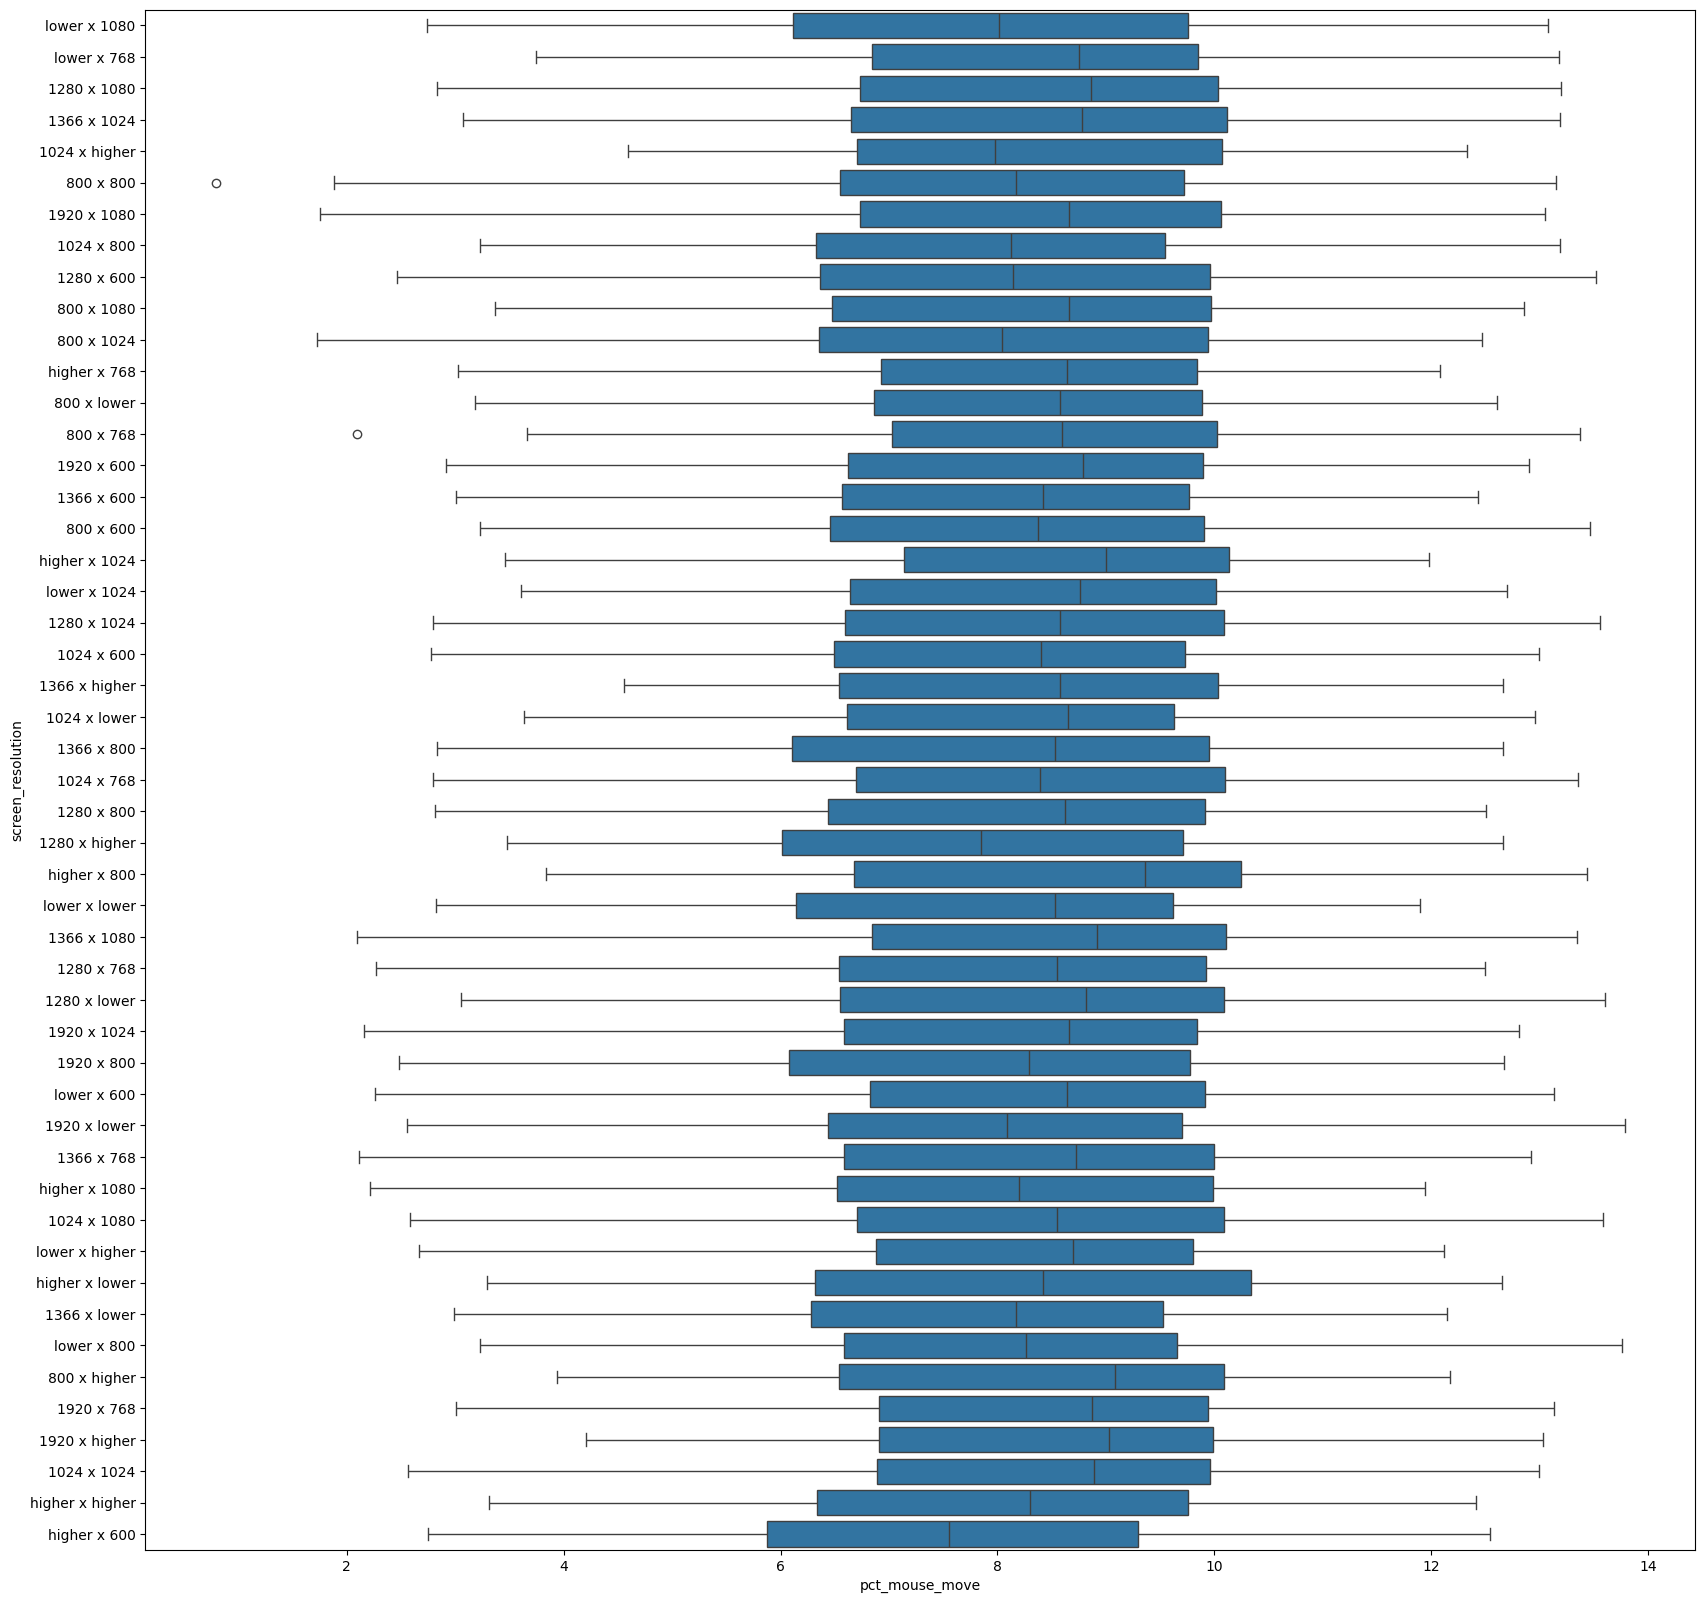

In [157]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=session, x="pct_mouse_move", y="screen_resolution", ax=ax)

The screen resolution does not seem to have an affect on the relative amount of mouse movement.

<Axes: xlabel='pct_rage_click', ylabel='browser_name'>

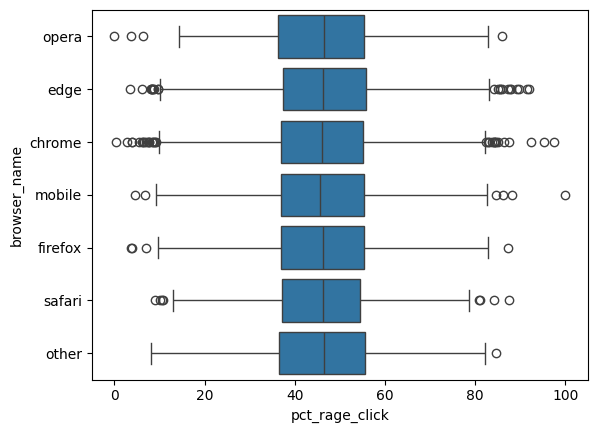

In [158]:
sns.boxplot(data=session, x="pct_rage_click", y="browser_name")

The browser used does not seem to have an affect on the users' tendency to burst into rage clicking during a session.

# Realtionships between 'ack' and the other attributes

In [159]:
# sns.pairplot(session.loc[:, ~session.columns.isin(["session_id","product_ean","user_id"])], hue='ack')

In the heatmap in the previous section, we can see that the following attributes have notably high/low correlations with 'ack':

* wild_mouse_duration
* scroll_move_total_rel_distance
* page_activity_duration
* pct_mouse_move
* pct_mouse_click

Additionally, we will take a look at how the screen_resolution and browser_name affect the 'ack' variable.

<Axes: xlabel='wild_mouse_duration', ylabel='ack'>

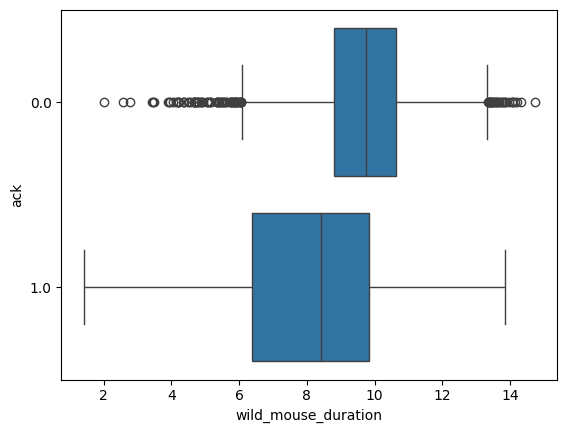

In [160]:
sns.boxplot(data=session, x="wild_mouse_duration", y=session['ack'].astype(str))

<Axes: xlabel='scroll_move_total_rel_distance', ylabel='ack'>

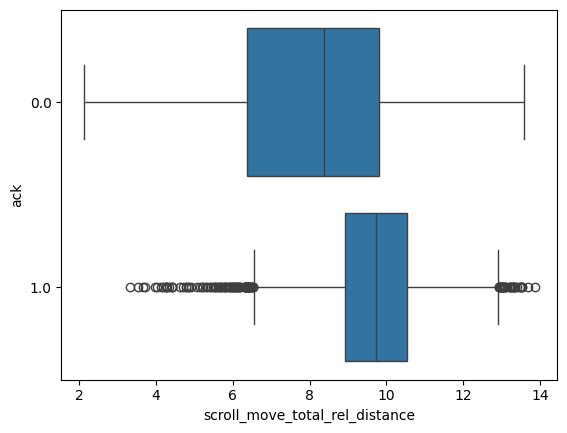

In [161]:
sns.boxplot(data=session, x="scroll_move_total_rel_distance", y=session['ack'].astype(str))

<Axes: xlabel='page_activity_duration', ylabel='ack'>

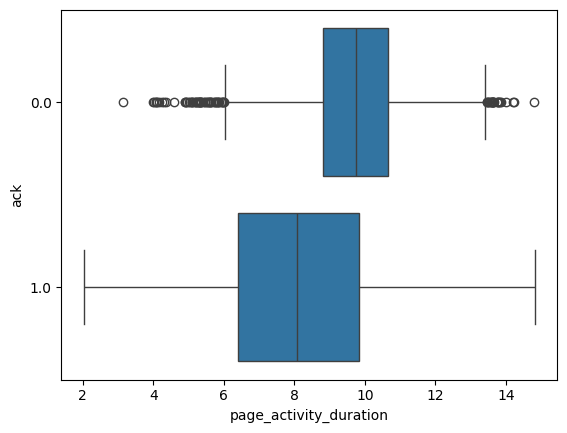

In [162]:
sns.boxplot(data=session, x="page_activity_duration", y=session['ack'].astype(str))

<Axes: xlabel='pct_mouse_move', ylabel='ack'>

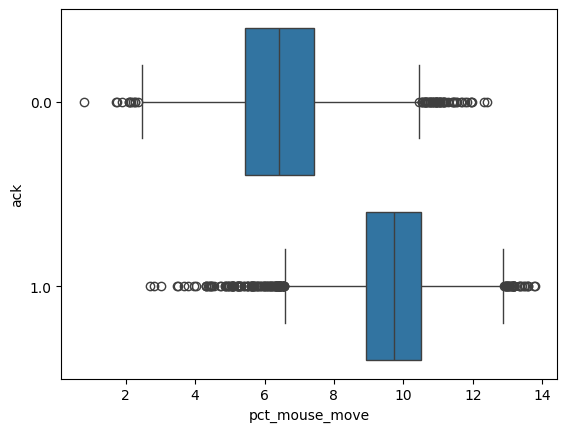

In [163]:
sns.boxplot(data=session, x="pct_mouse_move", y=session['ack'].astype(str))

<Axes: xlabel='pct_mouse_click', ylabel='ack'>

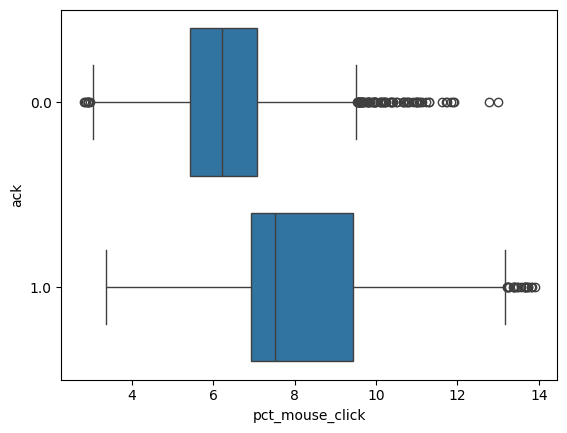

In [164]:
sns.boxplot(data=session, x="pct_mouse_click", y=session['ack'].astype(str))

These plots show how the distribution of the ack variable is affected by various continuous attributes, as suggested by the heatmap.

## Conclusions

There are numerous attribute pairs in the dataset that appear to affect each other. Some of them are:
* pct_mouse_click - pct_click
* pct_mouse_click - pct_mouse_move
* pct_mouse_click - wild_mouse_duration
* pct_click - page_activity_duration
* page_activity_duration - wild_mouse_duration

The **ack** attribute seems to be singnificantly affected by the following attributes:
* wild_mouse_duration
* scroll_move_total_rel_distance
* page_activity_duration
* pct_mouse_move
* pct_mouse_click
* pct_click

The flaws in the data stopped us from combining data from different files in this faze of the project; there are multiple rows with the same user_id in the user file, which would negatively affect our charts and conclusions. On top of that, there is no intersect between the product_ean in the product.csv file and the product_ean in the session.csv file, making it impossible to make any use of the product.csv file for now.

# HYPOTHESIS STAGE

## FIRST HYPOTHESIS: THE LONGER ON THE PAGE - THE LESS LIKELY TO MAKE A PURCHASE?

### HYPOTHESIS PROVING: (2 WAYS)

**ack ~ page_activity_duration**

**$H_0$** (null hypothesis): **The longer a person stays on the site, the more likely they are to buy something.**

**$H_1$ = $H_A$** (alternative hypothesis): **The longer a person stays on the site, the less likely they are to buy something.**

Null Hypothesis (H0): The longer the user actively browses the page, the more likely they are to make a purchase. <br>
Alternative Hypothesis (H1 or HA): The longer the user actively browses the page, the less likely they are to make a purchase.

Our significance level will be 0.05.<br>
α = 0.05

We can already see from the boxplot visualisation (sns.heatmap(session.select_dtypes(exclude=['int64','object']).corr(), ax=ax, annot=True, fmt=".3f")) that there is a relationship between page_activity_duration and the ack value. (correlation)

As it was in lesson 5 from 5th week:

We have several ways to test this type of relationship:

* we can look to see if there is a correlation between the two attributes
* we can try to *fit* a (e.g. linear) regression model
* we can test for differences between group means by number of cylinders.

So that we can use first point, which provide us the way of analysing in dependancies with correlation. And we will analyse it with Pearson Correlation (Pearson's r). 

**Let's get new dataset for analysing:**

In [165]:
ack_page_act_dur = session[['ack', 'page_activity_duration']]
ack_page_act_dur = ack_page_act_dur.dropna()
ack_page_act_dur

,ack,page_activity_duration
0,0.0,9.81613
1,0.0,8.43727
2,1.0,6.60643
3,1.0,8.13167
4,0.0,12.15022
...,...,...
10786,1.0,8.35908
10787,1.0,6.96837
10789,1.0,4.36895
10790,1.0,10.00149


### PEARSON CORRELATION COEFFICIENT AND P-VALUE

In [166]:
pearsonr(ack_page_act_dur['ack'], ack_page_act_dur['page_activity_duration'])

PearsonRResult(statistic=-0.3810022123909228, pvalue=0.0)

<Axes: xlabel='ack', ylabel='page_activity_duration'>

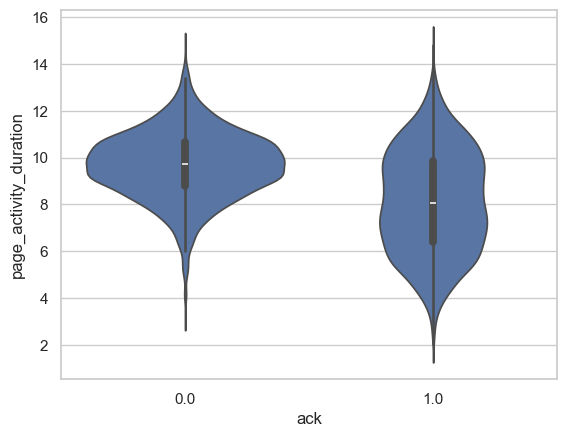

In [167]:
sns.set(style="whitegrid")
sns.violinplot(x='ack', y='page_activity_duration', data=ack_page_act_dur)

A correlation of -0.38 indicates that with increasing page_activity_duration the likelihood of purchasing (ack==1) tends to decrease.

A p-value close to 0 suggests a significant correlation between the variables. The correlation is very unlikely to be a coincidence.

### MANN-WHITNEY U TEST

In [168]:
ack_page_act_dur_ones = ack_page_act_dur[ack_page_act_dur['ack'] == 1]
ack_page_act_dur_zeros = ack_page_act_dur[ack_page_act_dur['ack'] == 0]
ack_page_act_dur_ones

,ack,page_activity_duration
2,1.0,6.60643
3,1.0,8.13167
8,1.0,5.76606
9,1.0,5.77089
12,1.0,9.62778
...,...,...
10786,1.0,8.35908
10787,1.0,6.96837
10789,1.0,4.36895
10790,1.0,10.00149


Mann-Whitney U Test with a continuous variable and a binary categorical variable compares the distribution of the continuous variable between the two categories of the binary categorical variable. 

In [169]:
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(ack_page_act_dur_ones['page_activity_duration'], ack_page_act_dur_zeros['page_activity_duration'], alternative='two-sided')

print(f'U Statistic: {u_statistic}')
print(f'p-value: {p_value}')

alpha = 0.05

if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference between the two groups.')


U Statistic: 8062418.0
p-value: 0.0
Reject the null hypothesis. There is a significant difference between the two groups.


A large U statistic suggests that the values in one group tend to be higher than the values in the other group, indicating a significant difference between the two groups.

### PRACTICAL CONTEXT OF THE  HYPTHESIS:

(array([   9.,   26.,   83.,  328.,  950., 1558., 1287.,  447.,  105.,
          13.]),
 array([ 3.15532 ,  4.318557,  5.481794,  6.645031,  7.808268,  8.971505,
        10.134742, 11.297979, 12.461216, 13.624453, 14.78769 ]),
 <BarContainer object of 10 artists>)

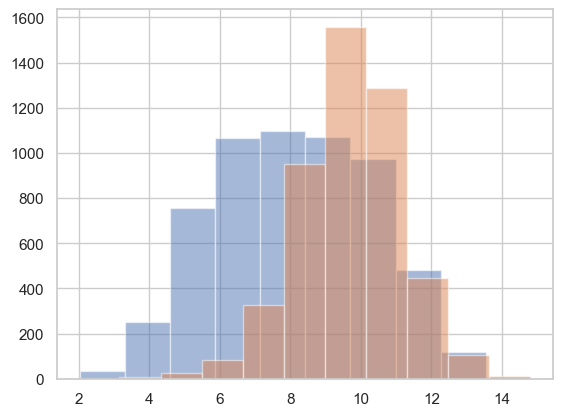

In [170]:
plt.hist(ack_page_act_dur_ones['page_activity_duration'], bins=10, alpha=0.5)
plt.hist(ack_page_act_dur_zeros['page_activity_duration'], bins=10, alpha=0.5)

**It is highly unlikely that the negative correlation between the time spent actively browsing the site and posiibility of performing a purchase is random. We can explain this relationship by the posiibility that people who stay on the site for a long time are more likely to be just researching the products, but are not really ready to perform a purchase.**

## HYPOTHESIS 2: THE AMOUNT OF MOUSE MOVEMENT DURING A SITE VISIT AFFECTS THE PROBABILITY OF THE USER PERFORMING A PURCHASE

**pct_mouse_move - ack**

H0: **The amount of mouse movemenet does not affect the probability of the user performing a purchase**<br>
H1: **The amount of mouse movemenet affects the probability of the user performing a purchase**

Similarly to the first hypothesis, we will perform a number of statistical tests and draw our conclusion.

In [171]:
ack_pct_mouse_move = session[['ack', 'pct_mouse_move']]
ack_pct_mouse_move = ack_pct_mouse_move.dropna()
ack_pct_mouse_move

,ack,pct_mouse_move
0,0.0,6.03169
1,0.0,5.84443
2,1.0,8.75647
3,1.0,5.68521
4,0.0,7.76429
...,...,...
10786,1.0,10.04616
10787,1.0,9.86641
10789,1.0,11.46814
10790,1.0,9.94778


### PEARSON CORRELATION COEFFICIENT AND P-VALUE

In [172]:
pearsonr(ack_pct_mouse_move['ack'], ack_pct_mouse_move['pct_mouse_move'])

PearsonRResult(statistic=0.7424897851302255, pvalue=0.0)

<Axes: xlabel='pct_mouse_move', ylabel='ack'>

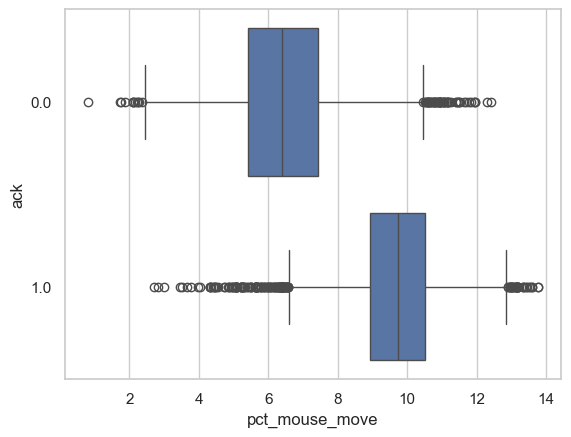

In [173]:
sns.set(style="whitegrid")
sns.boxplot(data=session, x="pct_mouse_move", y=session['ack'].astype(str))

Correlation of 0.74 indicates a strong connection between the variables, and the low p-value indicate it is unlikely due to chance.

### MANN-WHITNEY U TEST

In [174]:
ack_pct_mouse_move_ones = ack_pct_mouse_move[ack_pct_mouse_move['ack'] == 1]
ack_pct_mouse_move_zeros = ack_pct_mouse_move[ack_pct_mouse_move['ack'] == 0]
ack_pct_mouse_move_ones

,ack,pct_mouse_move
2,1.0,8.75647
3,1.0,5.68521
8,1.0,9.05619
9,1.0,10.51623
12,1.0,10.40299
...,...,...
10786,1.0,10.04616
10787,1.0,9.86641
10789,1.0,11.46814
10790,1.0,9.94778


In [175]:
u_statistic, p_value = mannwhitneyu(ack_pct_mouse_move_ones['pct_mouse_move'], ack_pct_mouse_move_zeros['pct_mouse_move'], alternative='two-sided')

print(f'U Statistic: {u_statistic}')
print(f'p-value: {p_value}')

alpha = 0.05

if p_value < alpha:
    print('Reject the null hypothesis. There is a significant correlation between the two groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant correlation between the two groups.')

U Statistic: 26269650.0
p-value: 0.0
Reject the null hypothesis. There is a significant correlation between the two groups.


(array([   4.,   45.,  247.,  924., 1423., 1250.,  587.,  236.,   67.,
          16.]),
 array([ 0.79465 ,  1.955767,  3.116884,  4.278001,  5.439118,  6.600235,
         7.761352,  8.922469, 10.083586, 11.244703, 12.40582 ]),
 <BarContainer object of 10 artists>)

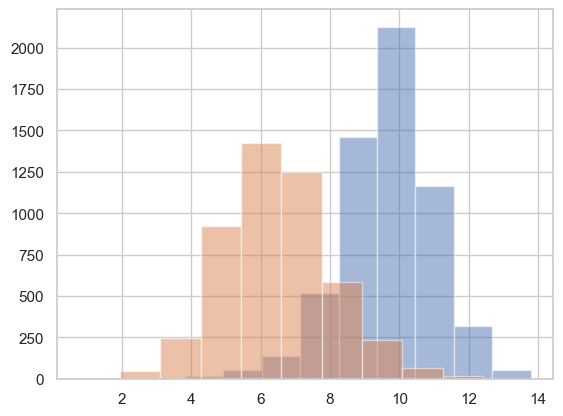

In [176]:
plt.hist(ack_pct_mouse_move_ones['pct_mouse_move'], bins=10, alpha=0.5)
plt.hist(ack_pct_mouse_move_zeros['pct_mouse_move'], bins=10, alpha=0.5)

**It is highly unlikely that the correlation between the amount of mouse movement during the browsing of a site and the posiibility of performing a purchase is random. Perhaps poeple get nervous when they have to spend their money, the more when they are not getting their products right after performing the purchase.**

# FAZE 2

# 1. Data integration and data cleaning

## Additional changes

Due to the problematic data in the user.csv and product.csv files, we will restrict our efforts on the session.csv file. For this reason, we will no longer need the 'user_id' and 'product_ean' columns. Also, we will not need the session_id column.

In [177]:
session = session.drop(columns =['user_id', 'product_ean', 'session_id'])

In [178]:
session.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10662 entries, 0 to 10791
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 10662 non-null  float64
 1   total_load_time                 10662 non-null  float64
 2   mouse_move_total_rel_distance   10662 non-null  float64
 3   session_start                   10662 non-null  object 
 4   ack                             10662 non-null  float64
 5   pct_click                       10662 non-null  float64
 6   browser_name                    10662 non-null  object 
 7   pct_mouse_move                  10651 non-null  float64
 8   pct_click_product_info          10651 non-null  float64
 9   pct_scroll_move_duration        10651 non-null  float64
 10  pct_scrandom                    10652 non-null  float64
 11  session_duration                10662 non-null  float64
 12  page_activity_duration          10662

## Missing values

In [179]:
from sklearn.impute import SimpleImputer

Missing values that were not resolved in the first faze:

In [180]:
session.isna().sum()

pct_mouse_click                    0
total_load_time                    0
mouse_move_total_rel_distance      0
session_start                      0
ack                                0
pct_click                          0
browser_name                       0
pct_mouse_move                    11
pct_click_product_info            11
pct_scroll_move_duration          11
pct_scrandom                      10
session_duration                   0
page_activity_duration             0
pct_rage_click                    11
scroll_move_total_rel_distance     0
pct_input                         10
pct_doubleclick                    0
pct_scroll_move                   11
pct_wild_mouse                    11
wild_mouse_duration               11
screen_resolution                  0
dtype: int64

We are dealing with missing values before resolving the outliers, so we will be replacing the missing calues with the median rather than the mean.

We will replace NaN values with the median in the following columns:
* pct_scroll_move
* pct_wild_mouse
* wild_mouse_duration
* pct_mouse_move
* pct_click_product_info

We will remove rows with a NaN value in the following columns:
* pct_rage_click
* pct_input
* pct_scroll_move_duration
* pct_scrandom

The following code performs the replacing:

In [181]:
columns_to_impute = ['pct_scroll_move', 'pct_wild_mouse', 'wild_mouse_duration', 'pct_mouse_move', 'pct_click_product_info']
imputers = {col: SimpleImputer(strategy='median') for col in columns_to_impute}

for col, imputer in imputers.items():
    session[col] = imputer.fit_transform(session[[col]])

In [182]:
# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# session['pct_scroll_move'] = imputer.fit_transform(session[['pct_scroll_move']])

Remove the rest of the rows with missing values:

In [183]:
session = session.dropna()

In [184]:
session.isna().sum()

pct_mouse_click                   0
total_load_time                   0
mouse_move_total_rel_distance     0
session_start                     0
ack                               0
pct_click                         0
browser_name                      0
pct_mouse_move                    0
pct_click_product_info            0
pct_scroll_move_duration          0
pct_scrandom                      0
session_duration                  0
page_activity_duration            0
pct_rage_click                    0
scroll_move_total_rel_distance    0
pct_input                         0
pct_doubleclick                   0
pct_scroll_move                   0
pct_wild_mouse                    0
wild_mouse_duration               0
screen_resolution                 0
dtype: int64

In [185]:
session.isnull().values.any()

False

There are no NaN values left.

## Outliers

Numerous columns with outliers have been resolved in the first faze of the project by removing the problematic rows.

We will be detecting outliers using the interquartile range. That means:
1. We find the first and the third quartile of the data
2. IQR is the difference between them (q3-q1)
3. If a value is higher than q3+1.5\*IQR or lower than q1-1.5\*IQR, it is an outlier.

This method does not require the data belong to a normal distribution.<br>
We will define 2 functions. One will replace the outliers with the value that was used as a bound to detect the outliers. The other function will delete the whole row containing the outlier.<br>
Screen screen_resolution and broser_name have reasonably few categories and so they have no outliers. Sorting the session_start column shows that all the data comes from a period between 2018 and 2023, and so there are no suspicious values.

In [186]:
session.groupby('browser_name').size()

browser_name
chrome     3154
edge       3183
firefox    1068
mobile     1073
opera       553
other       515
safari     1074
dtype: int64

In [187]:
session.groupby('screen_resolution').size()

screen_resolution
1024 x 1024        237
1024 x 1080        305
1024 x 600         247
1024 x 768         308
1024 x 800         245
1024 x higher       81
1024 x lower       153
1280 x 1024        294
1280 x 1080        420
1280 x 600         303
1280 x 768         421
1280 x 800         293
1280 x higher       99
1280 x lower       195
1366 x 1024        219
1366 x 1080        292
1366 x 600         268
1366 x 768         326
1366 x 800         270
1366 x higher       73
1366 x lower       168
1920 x 1024        315
1920 x 1080        463
1920 x 600         335
1920 x 768         447
1920 x 800         338
1920 x higher       78
1920 x lower       204
800 x 1024         243
800 x 1080         337
800 x 600          270
800 x 768          304
800 x 800          261
800 x higher        81
800 x lower        154
higher x 1024       74
higher x 1080      102
higher x 600        77
higher x 768       103
higher x 800        79
higher x higher     37
higher x lower      59
lower x 1024    

In [188]:
session['session_start'].sort_values()

3797    2018-09-23 04:56:25
3072    2018-09-23 08:30:55
883     2018-09-23 08:50:30
407     2018-09-23 09:13:40
1163    2018-09-23 13:40:07
               ...         
7043    2023-09-21 20:57:01
2643    2023-09-22 07:21:12
5001    2023-09-22 16:50:54
7219    2023-09-22 21:58:21
6841    2023-09-23 05:43:06
Name: session_start, Length: 10620, dtype: object

In [189]:
def replace_outliers_iqr(col_name, df):

    print('Column name: ', '\t', col)
    
    q1 = np.percentile(df[col_name], 25)
    q3 = np.percentile(df[col_name], 75)
    print('The first and the third quartile: ','\t', q1, '\t', q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print('Bounds for detecting outliers: ','\t', lwr_bound, '\t', upr_bound)

    df[col_name] = np.where(df[col_name]<lwr_bound, lwr_bound, df[col_name]) 
    df[col_name] = np.where(df[col_name]>upr_bound, upr_bound, df[col_name])

    print('\n')

# code heavily inspired by https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

In [190]:
def remove_outliers_iqr(col_name, df):

    print('Column name: ', '\t', col)
    
    print('Original data size: ', len(df[col_name]))
    q1 = np.percentile(df[col_name], 25)
    q3 = np.percentile(df[col_name], 75)
    print('The first and the third quartile: ','\t', q1, '\t', q3)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    print('Bounds for detecting outliers: ','\t', lwr_bound, '\t', upr_bound)

    df = df.loc[(df[col_name] >= lwr_bound)]
    df = df.loc[(df[col_name] <= upr_bound)]
    
    print('New data size: ', '\t', len(df[col_name]), '\n')

    return df

# code heavily inspired by https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

In [191]:
session.describe()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,ack,pct_click,pct_mouse_move,pct_click_product_info,pct_scroll_move_duration,pct_scrandom,session_duration,page_activity_duration,pct_rage_click,scroll_move_total_rel_distance,pct_input,pct_doubleclick,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
count,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000,10620.000000
mean,7.342343,4.039082,8.060280,0.549341,7.305557,8.234895,52.014866,8.062334,47.542415,149.631021,8.823020,46.140576,8.987040,1.267103,8.038955,48.323147,52.840683,8.818692
std,1.789157,2.850240,0.988896,0.497583,2.190921,2.133095,12.237776,0.995645,12.899409,57.603853,2.049767,13.589921,1.910239,3.040225,2.131197,13.552046,12.696162,2.056841
min,2.821160,0.013920,5.039260,0.000000,1.809170,0.794650,0.000000,4.431100,0.000000,0.001910,2.031710,0.000000,2.119410,0.000000,2.629710,0.000000,0.000000,1.414100
25%,6.220768,1.948155,7.384885,0.000000,5.706228,6.536460,43.837585,7.384800,38.833135,108.821720,7.442998,36.988530,7.990642,0.153593,6.351715,39.248577,44.242565,7.579063
50%,7.034725,3.396970,8.054455,1.000000,7.102885,8.556970,51.902950,8.066045,47.699520,149.855250,9.108190,46.199675,9.344565,0.479920,7.944525,48.416350,53.027710,9.220010
75%,8.149393,5.428280,8.729515,1.000000,8.748370,9.930250,60.190767,8.726205,56.343018,189.973273,10.328000,55.430275,10.290053,1.232595,9.734303,57.519905,61.365995,10.264915
max,13.899250,29.988430,11.356270,1.000000,14.661640,13.784830,100.000000,12.663590,100.000000,299.855910,14.819500,100.000000,13.865950,100.000000,13.918640,100.000000,100.000000,14.725690


In [192]:
session['ack'] = session['ack'].astype(str)
i = 0

for col in session.select_dtypes(include=['float64']).columns:
    if i < len(session.select_dtypes(include=['float64']).columns)/4*3:
        replace_outliers_iqr(col, session)
    else:
        session = remove_outliers_iqr(col, session)
    i = i+1

session['ack'] = session['ack'].astype(float)

Column name:  	 pct_mouse_click
The first and the third quartile:  	 6.2207675 	 8.149392500000001
Bounds for detecting outliers:  	 3.3278299999999983 	 11.042330000000003


Column name:  	 total_load_time
The first and the third quartile:  	 1.948155 	 5.42828
Bounds for detecting outliers:  	 -3.2720325 	 10.648467499999999


Column name:  	 mouse_move_total_rel_distance
The first and the third quartile:  	 7.384885000000001 	 8.729515000000001
Bounds for detecting outliers:  	 5.36794 	 10.746460000000003


Column name:  	 pct_click
The first and the third quartile:  	 5.706227500000001 	 8.74837
Bounds for detecting outliers:  	 1.1430137500000024 	 13.311583749999997


Column name:  	 pct_mouse_move
The first and the third quartile:  	 6.53646 	 9.93025
Bounds for detecting outliers:  	 1.4457750000000011 	 15.020934999999998


Column name:  	 pct_click_product_info
The first and the third quartile:  	 43.837585000000004 	 60.1907675
Bounds for detecting outliers:  	 19.307811250

In [193]:
session.describe()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,ack,pct_click,pct_mouse_move,pct_click_product_info,pct_scroll_move_duration,pct_scrandom,session_duration,page_activity_duration,pct_rage_click,scroll_move_total_rel_distance,pct_input,pct_doubleclick,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
count,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000
mean,7.275773,3.959131,8.061916,0.545893,7.281669,8.216007,51.999791,8.061194,47.525364,149.549872,8.851851,46.111272,9.021304,0.864960,8.042338,48.345764,52.902099,8.880095
std,1.674754,2.593855,0.984801,0.497913,2.181371,2.129906,12.136198,0.989592,12.813035,57.736836,2.038257,13.517985,1.862521,0.903904,2.140566,13.166658,12.314625,1.972988
min,3.327830,0.013920,5.367940,0.000000,1.809170,1.445775,19.307811,5.372693,12.568311,0.001910,3.115494,9.325912,4.541527,0.000000,2.629710,11.936140,18.872500,3.552480
25%,6.210770,1.948360,7.386550,0.000000,5.691380,6.519450,43.835110,7.383970,38.824640,108.542830,7.481110,36.972080,8.033520,0.160460,6.338440,39.315760,44.379780,7.644950
50%,7.021310,3.392890,8.058030,1.000000,7.071370,8.536740,51.902950,8.065420,47.671820,149.832470,9.133480,46.156890,9.364030,0.488580,7.954100,48.416350,53.056830,9.241810
75%,8.067070,5.426450,8.731700,1.000000,8.720880,9.911740,60.175790,8.726580,56.341050,190.063690,10.343240,55.406150,10.303840,1.241290,9.750150,57.475780,61.331580,10.276810
max,11.042330,10.648467,10.746460,1.000000,13.311584,13.784830,84.720541,10.738312,82.607841,299.855910,14.655504,83.092893,13.739168,2.851099,13.918640,84.779930,86.979760,14.215660


# 2. Data preprocessing execution

### Splitting the dataset into a training dataset and a test dataset

We will use 75% (the default) of the data to train the model and 25% to test it. This piece of code splits the dataset into a testing and a training dataset:

In [194]:
from sklearn.model_selection import train_test_split

session_train, session_test, ack_train, ack_test= train_test_split(session.loc[:, ~session.columns.isin(['ack'])], session['ack'], random_state=42)

From now on, we will only be working with the training datasets (session_train, ack_train):

## Data transformation

1. We need to ensure every column has a numeric value
2. some transformation
3. some scaling

### Encoding object variables

In [195]:
session_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 3347 to 7529
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 7770 non-null   float64
 1   total_load_time                 7770 non-null   float64
 2   mouse_move_total_rel_distance   7770 non-null   float64
 3   session_start                   7770 non-null   object 
 4   pct_click                       7770 non-null   float64
 5   browser_name                    7770 non-null   object 
 6   pct_mouse_move                  7770 non-null   float64
 7   pct_click_product_info          7770 non-null   float64
 8   pct_scroll_move_duration        7770 non-null   float64
 9   pct_scrandom                    7770 non-null   float64
 10  session_duration                7770 non-null   float64
 11  page_activity_duration          7770 non-null   float64
 12  pct_rage_click                  7770

Non-numeric columns and how we are going to deal with them:
1. session_start - we will replace it with 3 columns. The first will contain the year, the second the month and the third the hour of the day.
2. browser_name - we will encode each broser as an integer
3. screen_resolution - the same as browser_name

In [196]:
session_train['session_start_year'] = session_train['session_start'].apply(lambda x: int(x[0:4]))
session_train['session_start_month'] = session_train['session_start'].apply(lambda x: int(x[5:7]))
session_train['session_start_hour'] = session_train['session_start'].apply(lambda x: int(x[11:13]))

In [199]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
session_train['browser_name_encoded'] = label_encoder.fit_transform(session_train['browser_name'])
session_train['screen_resolution_encoded'] = label_encoder.fit_transform(session_train['screen_resolution'])

In [200]:
session_train = session_train.drop(columns =['screen_resolution', 'browser_name', 'session_start'])

In [201]:
session_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 3347 to 7529
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 7770 non-null   float64
 1   total_load_time                 7770 non-null   float64
 2   mouse_move_total_rel_distance   7770 non-null   float64
 3   pct_click                       7770 non-null   float64
 4   pct_mouse_move                  7770 non-null   float64
 5   pct_click_product_info          7770 non-null   float64
 6   pct_scroll_move_duration        7770 non-null   float64
 7   pct_scrandom                    7770 non-null   float64
 8   session_duration                7770 non-null   float64
 9   page_activity_duration          7770 non-null   float64
 10  pct_rage_click                  7770 non-null   float64
 11  scroll_move_total_rel_distance  7770 non-null   float64
 12  pct_input                       7770

### Transformations

### Data scaling